In [418]:
import pandas as pd
pd.set_option('display.max_columns', 999)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt

## Initialize train/test data

In [364]:
initial_df = pd.read_csv('Extract_with_headers.csv')

In [365]:
initial_df.head()

Trip ID Trip Start Timestamp  \
0  ffdc7dd1191ebef997a9869625ff7bf542ba4cea  2019-12-11 00:00:00   
1  ffd09c50d36e67f1ca578e5680cf43f9cf9ffad5  2019-12-11 00:00:00   
2  ffc42f184caaebb541bc34c0cb844ec3ec280011  2019-12-11 00:00:00   
3  ffb2e568c412d5d62951f59af44f333d954798b6  2019-12-11 00:00:00   
4  ff64aed6e87e9f3b6aba27d2b4ec9ea4fafd6a64  2019-12-11 00:00:00   

   Trip Seconds  Fare  Trip Miles  Pickup Community Area  \
0           791   7.5         3.8                     62   
1           363   5.0         2.4                      7   
2           332   5.0         0.9                      8   
3           935  10.0         6.0                      8   
4           658   7.5         2.5                     28   

   Dropoff Community Area  Pickup Centroid Latitude  \
0                      56                 41.792982   
1                       8                 41.914616   
2                      32                 41.892508   
3                      38                 41.891972   
4                       8                 41.885281   

   Pickup Centroid Longitude  Dropoff Centroid Longitude  \
0                 -87.724208                  -87.769615   
1                 -87.631717                  -87.618868   
2                 -87.626215                  -87.620993   
3                 -87.612945                  -87.611685   
4                 -87.657233                  -87.618868   

   Dropoff Centroid Latitude Mon Tue Wed Thu Fri Sat Sun Time_0_0 Time_0_15  \
0                  41.792592   f   f   t   f   f   f   f        t         f   
1                  41.890922   f   f   t   f   f   f   f        t         f   
2                  41.884987   f   f   t   f   f   f   f        t         f   
3                  41.814004   f   f   t   f   f   f   f        t         f   
4                  41.890922   f   f   t   f   f   f   f        t         f   

  Time_0_30 Time_0_45 Time_1_0 Time_1_15 Time_1_30 Time_1_45 Time_2_0  \
0         f         f        f         f         f         f        f   
1         f         f        f         f         f         f        f   
2         f         f        f         f         f         f        f   
3         f         f        f         f         f         f        f   
4         f         f        f         f         f         f        f   

  Time_2_15 Time_2_30 Time_2_45 Time_3_0 Time_3_15 Time_3_30 Time_3_45  \
0         f         f         f        f         f         f         f   
1         f         f         f        f         f         f         f   
2         f         f         f        f         f         f         f   
3         f         f         f        f         f         f         f   
4         f         f         f        f         f         f         f   

  Time_4_0 Time_4_15 Time_4_30 Time_4_45 Time_5_0 Time_5_15 Time_5_30  \
0        f         f         f         f        f         f         f   
1        f         f         f         f        f         f         f   
2        f         f         f         f        f         f         f   
3        f         f         f         f        f         f         f   
4        f         f         f         f        f         f         f   

  Time_5_45 Time_6_0 Time_6_15 Time_6_30 Time_6_45 Time_7_0 Time_7_15  \
0         f        f         f         f         f        f         f   
1         f        f         f         f         f        f         f   
2         f        f         f         f         f        f         f   
3         f        f         f         f         f        f         f   
4         f        f         f         f         f        f         f   

  Time_7_30 Time_7_45 Time_8_0 Time_8_15 Time_8_30 Time_8_45 Time_9_0  \
0         f         f        f         f         f         f        f   
1         f         f        f         f         f         f        f   
2         f         f        f         f         f         f        f   
3         f         f        f         f     

In [366]:
X = initial_df.drop(['Trip ID', 'Trip Start Timestamp', 'PCA_77', 'DCA_77'], axis = 1)

## Drop N/A values, then create X/y split

In [367]:
X = X.dropna().reset_index(drop = True)

In [368]:
X.head()

Trip Seconds  Fare  Trip Miles  Pickup Community Area  \
0           791   7.5         3.8                     62   
1           363   5.0         2.4                      7   
2           332   5.0         0.9                      8   
3           935  10.0         6.0                      8   
4           658   7.5         2.5                     28   

   Dropoff Community Area  Pickup Centroid Latitude  \
0                      56                 41.792982   
1                       8                 41.914616   
2                      32                 41.892508   
3                      38                 41.891972   
4                       8                 41.885281   

   Pickup Centroid Longitude  Dropoff Centroid Longitude  \
0                 -87.724208                  -87.769615   
1                 -87.631717                  -87.618868   
2                 -87.626215                  -87.620993   
3                 -87.612945                  -87.611685   
4                 -87.657233                  -87.618868   

   Dropoff Centroid Latitude Mon Tue Wed Thu Fri Sat Sun Time_0_0 Time_0_15  \
0                  41.792592   f   f   t   f   f   f   f        t         f   
1                  41.890922   f   f   t   f   f   f   f        t         f   
2                  41.884987   f   f   t   f   f   f   f        t         f   
3                  41.814004   f   f   t   f   f   f   f        t         f   
4                  41.890922   f   f   t   f   f   f   f        t         f   

  Time_0_30 Time_0_45 Time_1_0 Time_1_15 Time_1_30 Time_1_45 Time_2_0  \
0         f         f        f         f         f         f        f   
1         f         f        f         f         f         f        f   
2         f         f        f         f         f         f        f   
3         f         f        f         f         f         f        f   
4         f         f        f         f         f         f        f   

  Time_2_15 Time_2_30 Time_2_45 Time_3_0 Time_3_15 Time_3_30 Time_3_45  \
0         f         f         f        f         f         f         f   
1         f         f         f        f         f         f         f   
2         f         f         f        f         f         f         f   
3         f         f         f        f         f         f         f   
4         f         f         f        f         f         f         f   

  Time_4_0 Time_4_15 Time_4_30 Time_4_45 Time_5_0 Time_5_15 Time_5_30  \
0        f         f         f         f        f         f         f   
1        f         f         f         f        f         f         f   
2        f         f         f         f        f         f         f   
3        f         f         f         f        f         f         f   
4        f         f         f         f        f         f         f   

  Time_5_45 Time_6_0 Time_6_15 Time_6_30 Time_6_45 Time_7_0 Time_7_15  \
0         f        f         f         f         f        f         f   
1         f        f         f         f         f        f         f   
2         f        f         f         f         f        f         f   
3         f        f         f         f         f        f         f   
4         f        f         f         f         f        f         f   

  Time_7_30 Time_7_45 Time_8_0 Time_8_15 Time_8_30 Time_8_45 Time_9_0  \
0         f         f        f         f         f         f        f   
1         f         f        f         f         f         f        f   
2         f         f        f         f         f         f        f   
3         f         f        f         f         f         f        f   
4         f         f        f         f         f         f        f   

  Time_9_15 Time_9_30 Time_9_45 Time_10_0 Time_10_15 Time_10_30 Time_10_45  \
0         f         f         f         f          f          f          f   
1         f         f         f         f          f          f          f   
2         f         f         f         

In [369]:
y = X['Fare']

In [370]:
X = X.drop(['Fare'], axis = 1)

## Confirm X and y have same length

In [371]:
X.shape

(1129, 263)

In [372]:
len(y)

1129

In [373]:
for column in range(len(X.columns)):
    print(X.columns[column])

Trip Seconds
Trip Miles
Pickup Community Area
Dropoff Community Area
Pickup Centroid Latitude
Pickup Centroid Longitude
Dropoff Centroid Longitude
Dropoff Centroid Latitude
Mon
Tue
Wed
Thu
Fri
Sat
Sun
Time_0_0
Time_0_15
Time_0_30
Time_0_45
Time_1_0
Time_1_15
Time_1_30
Time_1_45
Time_2_0
Time_2_15
Time_2_30
Time_2_45
Time_3_0
Time_3_15
Time_3_30
Time_3_45
Time_4_0
Time_4_15
Time_4_30
Time_4_45
Time_5_0
Time_5_15
Time_5_30
Time_5_45
Time_6_0
Time_6_15
Time_6_30
Time_6_45
Time_7_0
Time_7_15
Time_7_30
Time_7_45
Time_8_0
Time_8_15
Time_8_30
Time_8_45
Time_9_0
Time_9_15
Time_9_30
Time_9_45
Time_10_0
Time_10_15
Time_10_30
Time_10_45
Time_11_0
Time_11_15
Time_11_30
Time_11_45
Time_12_0
Time_12_15
Time_12_30
Time_12_45
Time_13_0
Time_13_15
Time_13_30
Time_13_45
Time_14_0
Time_14_15
Time_14_30
Time_14_45
Time_15_0
Time_15_15
Time_15_30
Time_15_45
Time_16_0
Time_16_15
Time_16_30
Time_16_45
Time_17_0
Time_17_15
Time_17_30
Time_17_45
Time_18_0
Time_18_15
Time_18_30
Time_18_45
Time_19_0
Time_19_15
T

## Replace 't', 'f' with 1,0 for Boolean analysis

In [374]:
for index, row in X.iterrows():
    print(f'Beginning analysis on index = {index}')
    for j in range(len(X.columns)):
#         print(X.at[index, X.columns[j]])
#         print(index)
#         if index < 1:
        if(X.at[index, X.columns[j]]) == 'f':
#             X.iloc[index][X.columns[j]] = '0'
            X.at[index, X.columns[j]] = 0
        elif(X.at[index, X.columns[j]]) == 't':
            X.at[index, X.columns[j]] = 1

Beginning analysis on index = 0
Beginning analysis on index = 1
Beginning analysis on index = 2
Beginning analysis on index = 3
Beginning analysis on index = 4
Beginning analysis on index = 5
Beginning analysis on index = 6
Beginning analysis on index = 7
Beginning analysis on index = 8
Beginning analysis on index = 9
Beginning analysis on index = 10
Beginning analysis on index = 11
Beginning analysis on index = 12
Beginning analysis on index = 13
Beginning analysis on index = 14
Beginning analysis on index = 15
Beginning analysis on index = 16
Beginning analysis on index = 17
Beginning analysis on index = 18
Beginning analysis on index = 19
Beginning analysis on index = 20
Beginning analysis on index = 21
Beginning analysis on index = 22
Beginning analysis on index = 23
Beginning analysis on index = 24
Beginning analysis on index = 25
Beginning analysis on index = 26
Beginning analysis on index = 27
Beginning analysis on index = 28
Beginning analysis on index = 29
Beginning analysis o

Beginning analysis on index = 282
Beginning analysis on index = 283
Beginning analysis on index = 284
Beginning analysis on index = 285
Beginning analysis on index = 286
Beginning analysis on index = 287
Beginning analysis on index = 288
Beginning analysis on index = 289
Beginning analysis on index = 290
Beginning analysis on index = 291
Beginning analysis on index = 292
Beginning analysis on index = 293
Beginning analysis on index = 294
Beginning analysis on index = 295
Beginning analysis on index = 296
Beginning analysis on index = 297
Beginning analysis on index = 298
Beginning analysis on index = 299
Beginning analysis on index = 300
Beginning analysis on index = 301
Beginning analysis on index = 302
Beginning analysis on index = 303
Beginning analysis on index = 304
Beginning analysis on index = 305
Beginning analysis on index = 306
Beginning analysis on index = 307
Beginning analysis on index = 308
Beginning analysis on index = 309
Beginning analysis on index = 310
Beginning anal

Beginning analysis on index = 547
Beginning analysis on index = 548
Beginning analysis on index = 549
Beginning analysis on index = 550
Beginning analysis on index = 551
Beginning analysis on index = 552
Beginning analysis on index = 553
Beginning analysis on index = 554
Beginning analysis on index = 555
Beginning analysis on index = 556
Beginning analysis on index = 557
Beginning analysis on index = 558
Beginning analysis on index = 559
Beginning analysis on index = 560
Beginning analysis on index = 561
Beginning analysis on index = 562
Beginning analysis on index = 563
Beginning analysis on index = 564
Beginning analysis on index = 565
Beginning analysis on index = 566
Beginning analysis on index = 567
Beginning analysis on index = 568
Beginning analysis on index = 569
Beginning analysis on index = 570
Beginning analysis on index = 571
Beginning analysis on index = 572
Beginning analysis on index = 573
Beginning analysis on index = 574
Beginning analysis on index = 575
Beginning anal

Beginning analysis on index = 809
Beginning analysis on index = 810
Beginning analysis on index = 811
Beginning analysis on index = 812
Beginning analysis on index = 813
Beginning analysis on index = 814
Beginning analysis on index = 815
Beginning analysis on index = 816
Beginning analysis on index = 817
Beginning analysis on index = 818
Beginning analysis on index = 819
Beginning analysis on index = 820
Beginning analysis on index = 821
Beginning analysis on index = 822
Beginning analysis on index = 823
Beginning analysis on index = 824
Beginning analysis on index = 825
Beginning analysis on index = 826
Beginning analysis on index = 827
Beginning analysis on index = 828
Beginning analysis on index = 829
Beginning analysis on index = 830
Beginning analysis on index = 831
Beginning analysis on index = 832
Beginning analysis on index = 833
Beginning analysis on index = 834
Beginning analysis on index = 835
Beginning analysis on index = 836
Beginning analysis on index = 837
Beginning anal

Beginning analysis on index = 1070
Beginning analysis on index = 1071
Beginning analysis on index = 1072
Beginning analysis on index = 1073
Beginning analysis on index = 1074
Beginning analysis on index = 1075
Beginning analysis on index = 1076
Beginning analysis on index = 1077
Beginning analysis on index = 1078
Beginning analysis on index = 1079
Beginning analysis on index = 1080
Beginning analysis on index = 1081
Beginning analysis on index = 1082
Beginning analysis on index = 1083
Beginning analysis on index = 1084
Beginning analysis on index = 1085
Beginning analysis on index = 1086
Beginning analysis on index = 1087
Beginning analysis on index = 1088
Beginning analysis on index = 1089
Beginning analysis on index = 1090
Beginning analysis on index = 1091
Beginning analysis on index = 1092
Beginning analysis on index = 1093
Beginning analysis on index = 1094
Beginning analysis on index = 1095
Beginning analysis on index = 1096
Beginning analysis on index = 1097
Beginning analysis o

In [375]:
X.head()

Trip Seconds  Trip Miles  Pickup Community Area  Dropoff Community Area  \
0           791         3.8                     62                      56   
1           363         2.4                      7                       8   
2           332         0.9                      8                      32   
3           935         6.0                      8                      38   
4           658         2.5                     28                       8   

   Pickup Centroid Latitude  Pickup Centroid Longitude  \
0                 41.792982                 -87.724208   
1                 41.914616                 -87.631717   
2                 41.892508                 -87.626215   
3                 41.891972                 -87.612945   
4                 41.885281                 -87.657233   

   Dropoff Centroid Longitude  Dropoff Centroid Latitude Mon Tue Wed Thu Fri  \
0                  -87.769615                  41.792592   0   0   1   0   0   
1                  -87.618868                  41.890922   0   0   1   0   0   
2                  -87.620993                  41.884987   0   0   1   0   0   
3                  -87.611685                  41.814004   0   0   1   0   0   
4                  -87.618868                  41.890922   0   0   1   0   0   

  Sat Sun Time_0_0 Time_0_15 Time_0_30 Time_0_45 Time_1_0 Time_1_15 Time_1_30  \
0   0   0        1         0         0         0        0         0         0   
1   0   0        1         0         0         0        0         0         0   
2   0   0        1         0         0         0        0         0         0   
3   0   0        1         0         0         0        0         0         0   
4   0   0        1         0         0         0        0         0         0   

  Time_1_45 Time_2_0 Time_2_15 Time_2_30 Time_2_45 Time_3_0 Time_3_15  \
0         0        0         0         0         0        0         0   
1         0        0         0         0         0        0         0   
2         0        0         0         0         0        0         0   
3         0        0         0         0         0        0         0   
4         0        0         0         0         0        0         0   

  Time_3_30 Time_3_45 Time_4_0 Time_4_15 Time_4_30 Time_4_45 Time_5_0  \
0         0         0        0         0         0         0        0   
1         0         0        0         0         0         0        0   
2         0         0        0         0         0         0        0   
3         0         0        0         0         0         0        0   
4         0         0        0         0         0         0        0   

  Time_5_15 Time_5_30 Time_5_45 Time_6_0 Time_6_15 Time_6_30 Time_6_45  \
0         0         0         0        0         0         0         0   
1         0         0         0        0         0         0         0   
2         0         0         0        0         0         0         0   
3         0         0         0        0         0         0         0   
4         0         0         0        0         0         0         0   

  Time_7_0 Time_7_15 Time_7_30 Time_7_45 Time_8_0 Time_8_15 Time_8_30  \
0        0         0         0         0        0         0         0   
1        0         0         0         0        0         0         0   
2        0         0         0         0        0         0         0   
3        0         0         0         0        0         0         0   
4        0         0         0         0        0         0         0   

  Time_8_45 Time_9_0 Time_9_15 Time_9_30 Time_9_45 Time_10_0 Time_10_15  \
0         0        0         0         0         0         0          0   
1         0        0         0         0         0         0          0   
2         0        0         0         0         0         0          0   
3         0        0         0         0         0         0          0   
4         0        0         0         0         0         0          0   

  Ti

In [376]:
# # Convert timestamp to unix
# def convert_to_timestamp(x):
#     """Convert date objects to integers"""
# #     for element in x.iterrows():
# #         element[]
#     return time.mktime(x.to_datetime().timetuple())

In [377]:
# X['Trip Start Timestamp'] = X['Trip Start Timestamp'].astype(convert_to_timestamp)
# X['Trip Start Timestamp'] = X['Trip Start Timestamp'].astype(float)

## Create Train/Test Split

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [379]:
# X_train.shape

In [380]:
# len(y_train)

## Scale Data

In [381]:
scaler = MinMaxScaler()

In [382]:
X_scaler = scaler.fit(X_train)
# y_scaler = scaler.fit(y_train)

In [383]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.fit_transform(X_test)

In [384]:
len(X_train_scaled)

846

In [385]:
# y_train = y_train.astype(int)
# y_train[a] = [int(y_train[a]) for a in y_train]
y_train = [float(i) for i in y_train]
y_train

[20.0,
 10.0,
 2.5,
 12.5,
 15.0,
 7.5,
 20.0,
 10.0,
 2.5,
 5.0,
 7.5,
 12.5,
 10.0,
 10.0,
 10.0,
 5.0,
 5.0,
 5.0,
 17.5,
 15.0,
 5.0,
 10.0,
 12.5,
 10.0,
 7.5,
 10.0,
 5.0,
 5.0,
 5.0,
 17.5,
 2.5,
 12.5,
 2.5,
 22.5,
 5.0,
 10.0,
 7.5,
 2.5,
 10.0,
 7.5,
 7.5,
 2.5,
 7.5,
 12.5,
 7.5,
 10.0,
 10.0,
 5.0,
 10.0,
 5.0,
 17.5,
 7.5,
 10.0,
 10.0,
 10.0,
 2.5,
 15.0,
 12.5,
 5.0,
 7.5,
 7.5,
 7.5,
 5.0,
 17.5,
 7.5,
 12.5,
 7.5,
 10.0,
 12.5,
 5.0,
 7.5,
 5.0,
 7.5,
 5.0,
 5.0,
 67.5,
 10.0,
 5.0,
 7.5,
 7.5,
 7.5,
 5.0,
 5.0,
 7.5,
 15.0,
 7.5,
 7.5,
 7.5,
 7.5,
 10.0,
 10.0,
 5.0,
 12.5,
 22.5,
 10.0,
 10.0,
 10.0,
 5.0,
 5.0,
 5.0,
 7.5,
 10.0,
 5.0,
 5.0,
 7.5,
 7.5,
 2.5,
 7.5,
 17.5,
 12.5,
 2.5,
 7.5,
 5.0,
 7.5,
 10.0,
 10.0,
 5.0,
 2.5,
 7.5,
 10.0,
 2.5,
 7.5,
 12.5,
 10.0,
 5.0,
 22.5,
 22.5,
 2.5,
 5.0,
 5.0,
 5.0,
 12.5,
 10.0,
 2.5,
 17.5,
 12.5,
 15.0,
 5.0,
 7.5,
 7.5,
 2.5,
 10.0,
 5.0,
 2.5,
 7.5,
 2.5,
 10.0,
 10.0,
 7.5,
 30.0,
 15.0,
 10.0,
 7.5,
 22.5,
 40.0,
 1

In [386]:
true_values = y_test.reset_index()['Fare'].tolist()
true_values

[7.5,
 12.5,
 2.5,
 7.5,
 7.5,
 2.5,
 10.0,
 5.0,
 5.0,
 10.0,
 17.5,
 5.0,
 2.5,
 2.5,
 25.0,
 12.5,
 5.0,
 7.5,
 17.5,
 17.5,
 7.5,
 7.5,
 10.0,
 5.0,
 12.5,
 2.5,
 5.0,
 7.5,
 20.0,
 5.0,
 5.0,
 7.5,
 5.0,
 5.0,
 25.0,
 5.0,
 5.0,
 7.5,
 10.0,
 2.5,
 5.0,
 5.0,
 20.0,
 5.0,
 7.5,
 10.0,
 5.0,
 5.0,
 7.5,
 7.5,
 7.5,
 45.0,
 5.0,
 10.0,
 7.5,
 5.0,
 22.5,
 5.0,
 2.5,
 12.5,
 12.5,
 5.0,
 2.5,
 5.0,
 7.5,
 15.0,
 7.5,
 5.0,
 7.5,
 10.0,
 10.0,
 10.0,
 5.0,
 5.0,
 7.5,
 17.5,
 5.0,
 20.0,
 7.5,
 12.5,
 7.5,
 7.5,
 5.0,
 7.5,
 10.0,
 5.0,
 10.0,
 7.5,
 7.5,
 12.5,
 2.5,
 17.5,
 25.0,
 7.5,
 15.0,
 5.0,
 10.0,
 10.0,
 7.5,
 12.5,
 17.5,
 7.5,
 10.0,
 20.0,
 5.0,
 12.5,
 12.5,
 7.5,
 5.0,
 25.0,
 10.0,
 5.0,
 5.0,
 22.5,
 5.0,
 22.5,
 7.5,
 7.5,
 12.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 7.5,
 5.0,
 5.0,
 5.0,
 15.0,
 10.0,
 15.0,
 12.5,
 12.5,
 2.5,
 10.0,
 17.5,
 5.0,
 7.5,
 10.0,
 5.0,
 7.5,
 10.0,
 12.5,
 5.0,
 2.5,
 12.5,
 27.5,
 5.0,
 10.0,
 10.0,
 10.0,
 2.5,
 5.0,
 12.5,
 12.5,
 7.5,
 

In [387]:
len(y_train)

846

# Train Model

### Original Model

In [495]:
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model
# clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, shuffle = True)
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [496]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [497]:
scaled_predict = clf.predict(X_test_scaled)

In [498]:
score = clf.score(X_train_scaled, y_train)
score

0.8830300978154193

In [499]:
new_score = clf.score(X_test_scaled, y_test)
new_score

0.8278037540524635

In [ ]:
results_df = pd.DataFrame(columns = ['Prediction', 'Actual'])

In [ ]:
results_df['Prediction'] = scaled_predict

In [ ]:
results_df['Actual'] = true_values

In [ ]:
percent_change = []
for i in range(len(scaled_predict)):
    percent_change.append(100 *(scaled_predict[i] - true_values[i]) / true_values[i])

In [ ]:
results_df['Percent Change'] = percent_change

In [ ]:
bins = [-100, -20, -10, -5, 0, 5, 10, 20, 100]
labels = ['-100% to -20%','-20% to -10%','-10% to -5%', '-5% to 0%', '0% to 5%', '5% to 10%', '10% to 20%', '20% to 100']

In [ ]:
results_df['binned'] = pd.cut(results_df['Percent Change'], bins=bins, labels=labels)

In [ ]:
results_df['binned'].value_counts()

### Test Models

In [506]:
test_clf = linear_model.SGDRegressor()


In [508]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [.01, .001, .0001, .00001],
              'epsilon': [0.1, 0.01, 0.001, 0.0001],
              'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'],
              'eta0':[.1, .01, .001],
              'early_stopping' : [False, True],
              'tol': [1e-4, 1e-3, 1e-2, 1e-1],
              'max_iter' : [500, 1000, 1500, 2000]}
grid = GridSearchCV(test_clf, param_grid, verbose=3)

In [509]:
test_clf.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [510]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6144 candidates, totalling 18432 fits
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-8272505562625110485759514640384.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-17046874271377531849374622023680.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-61759304392459200996574006083584.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constan

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-2172858735303522695822224392192.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-235332671146762225244337864704.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-28636119225083434924412260843520.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-63174734706827437771186977636352.000, total=   

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-135597926550181857288946475597824.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-19944478985144203348007152779264.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-55091792221917218310799228928.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-45692436223937465961538035646464.0

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-2888575003153689966058405888.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-143532544693205542818021376.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-2818082806162031418294665216.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-17832990553217908231601389568.000, total=   0.1s
[

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-704833017704648675683934928896.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-191071953830684332278111272960.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-1224409029203575586935076290560.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-92920557314148394767933767680.000, to

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-30476597425780565657243353088.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-694535509963936412328972517376.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-717255736589909657300034912256.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-8108422616528200

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-67224455301206632300544.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-350255734632972340428800.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-637169797486924282200064.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-490786785803414435528704.000, total=   0.1s
[CV] alpha=0.01, e

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-343151104796233588205642842112.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-3967341336183340348913494261760.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-672281353437314953750960406528.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-2815978510015961810696404992

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-727601448175469001173767290880.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-68102707994889348907012194304.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-4462196477529914535908999168.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-117319466530197039005818683392.000, total= 

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-32180278473864362674094080.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-341423414021714654517002240.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-352737335303246770073501696.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-457268942817337106480758784.000, total=   0.1s

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1, score=-2412859313132045562917421056.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1, score=-3467289259111915070534189056.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-2866250417177364198439518208.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-94422825482648321945239552.000, to

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-54615959554311348931264512.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-77429599501779636915798016.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-3991439273782246451340902400.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-11522149239271936661338980352.00

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-17479646435225756499968.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-120497328406315122294784.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-1291337240875350622208.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-3899915974164259799040.000, total=   0.1s
[CV

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-84893327832285492281344.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-25949419966752431800320.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-219676581442912237125632.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-6467045496607167060109164544.000, total=   0.0s
[CV] al

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-211833483328457203402145792.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-426221827468906744552357888.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-19139243748974354996356186112.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-24803769113605114281330737152.000, 

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-24868714204333921183375294464.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-28122493321476386250274373632.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-20433649497172552850285264896.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-6613886921989004568832245760.000, to

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-91133295093460234253767802880.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-3982259587387800481169408.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-24366432282670266755055616.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-832660843147595153470

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-8677742108698680773050368.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-106391561180354048950272.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-26109988847751351532257280.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-78505893260000852667531264.000

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-29842037780565696512.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-2707771125219485286400.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-512435525916661579776.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-31317958588423319552.000, total=   0.1s
[CV]

[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-23824075825661104128.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-4233176726312430075904.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-766400714074736164864.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-123258442016968425472.000, total=   0.1s
[CV] alpha=0.01, ea

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-221699038196396759527024570138624.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-10986788150445950425092119855104.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-7082518654539926376488103837696.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1, score=-239575497428011663049093424349

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-1417530242364406967092379648.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-2791823382074043411852165120.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-76141799353716605319563444224.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-353019773326589987634806784.000, total

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-228739739195480929957052416.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-9313570231500359860005896192.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-285444375646331398151733248.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-96447431161812036748379684864.000, total=   0.

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-510890886355780757256082030592.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-1349210224722989895053721206784.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-553529406767942810689005944832.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-38287987572287

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-567873938790998427566080.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-8732740099560050786304.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-33333830730985024520192.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-1230131582151964753920.000, total=   0.1s
[CV] alpha=

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-2309142815139724263424.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-74725274715660973244416.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-536512838771729508597760.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-43475394601004472205312.000, total=   0.1s
[CV] alph

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1, score=-49809448705286201091020554240.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-1523286817680099152299858853888.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-237794401854774830610396479488.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-1296716144859835

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-12671351976934720199614005248.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-20706700166427677435503837184.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-14563617408365222414730133504.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-34268534955567009577182429184.000, total=  

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-10675383357929040591615688704.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-35153412522788086922631708672.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-6228886982783304558706688.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-22171014324072466438378487808.0

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-511922703070594346615046144.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-109356766394589597638066176.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-833003970437388737412333568.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-13610700891903788448743424

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-23649287172402794463232.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-64790839895619947986944.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-8211763141561233178624.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-290711771839952731504640.000, total=   0.1s
[CV] al

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-48796087797039530770432.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-105595983875915558944768.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-15574063119729590009856.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-20052103710341433655296.000, total= 

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-1313943198112798514438209536.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-190152591997834525736435712.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-6433401881969148514665496576.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-3304891426517093

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-92086153352248454444895698944.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-9160157075357859542623846400.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01, score=-2139104378989422854956646400.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01, score=-1274854265810777537150713856.000, to

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-585446814586592077581123584.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-5189495510080090482820513792.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-12275687009840710298198081536.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-245696767097423809779

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-161537879874916182883565568.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-476331421073729317240832.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-40869052102161630280810496.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-42845656819570149267865

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-449966398000842539008.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-2795327308440823922688.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001, score=-108518680167392591872.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001, score=-4832932814266479673344.000, total=   0.1s
[

[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-1805628608423460339712.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-3977237673375492472832.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-2596520213243586150400.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-2218165909021193928704.000, total=   0.0s
[CV] a

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-32073400431678125553366553591808.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-559684554940047224268463800320.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-234441707613929283038420739817472.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-5656756489849870635

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-11686981750765132232294213353472.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-15929247128079800748591808512.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-17121167055080098933768192.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-4704943796466614137983598592.00

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-5972569502521159140421664768.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-10372788870926191988588937216.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-1534550263274209850526007296.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-2795508915783404019687358464.000, total=   

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-73487330296934054687263424512.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-24936161750106113524377845760.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-130792078956557488374924967936.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-18381

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-102212299574403465817127649280.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-2505078973323496827400486912.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-98498059676651178527400394752.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-44056604210640718113

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-34763052876908629852160.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-526198853897405675339776.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-425375523549564878454784.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-710708786428482416541696.000, total=   0.1s

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-74623957565510464664756027392.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-411888887361637411095574478848.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-298939950460860968609291173888.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-4652394040717

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-107822771819270805152954580992.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-551586735010913833626288259072.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-41737772194847592941541654528.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-569474478349648152498274

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-6428912934577301790973231104.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-62610525657872262211043328.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-1096117568031983404148850688.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-84015570783771628501959966720.000,

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-11614843335714779064849924096.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-980167554086714046240784384.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-5153125336523937497779011584.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-586937999526879715993321472.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-728792627448026740796948480.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1020026282454137693624336384.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-8938844680962662

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-477556835340582035390464.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-86886645161337544507392.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-22946681323238188908544.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-56387952822139094040576.000, total=

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2767450413219226583040000000.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2106158169933032822522511360.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-1962354840061656699313848320.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-21596888918072

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-9271403520010391368161558528.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-23053417100757022379167711232.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-2117865085885549069322944512.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-257253065542231720327

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-1863599272215217665514405888.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-4117546102417522327625400320.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-54598195701578636441157632.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-4275111040124440985462636

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1, score=-5105656852873338490454016.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-91326909076715747646898176.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-7216043654442271859802112.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-568

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-32092572008958764288835584.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-746645614553193242427392.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-14537456656731395577610240.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1732212564

[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-56527088512404996096.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-61607638533422399488.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-1805524239526328795136.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-556422656502234480640.000, total=   

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.001, score=-60720317462454090126802821316608.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-505226020882468105483208525611008.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-77229719282847052427231143919616.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-4630856258407256105

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1, score=-1465793326483156878792799027200.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1, score=-201727019348853815946353083154432.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-14103257290202037337457462083584.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-228817021

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-93113999469170403489873920.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-200204087808129050261585920.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-51369572786372883577449742336.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-468918064135758553980862464.000, t

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-2388658480412857468373172224.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-75883605441275289584820813824.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-228218075099541653462529867776.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-62665326398981616

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-612839268232543336478304894976.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-4240309132096359891066272350208.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-181761988978616540767316869120.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-65648302489970105384960.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-776403210161116801925120.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-243240462354453721251840.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-618978295248160609533952.000, total=   0.1s
[

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-443254528872632773771264.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-3195921016007699726336.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-601101787444558402945024.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-612800680851339185487872.000, total=   

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-4492603607928214097064099840.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-222022426993552311775649595392.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-4484348281311359817069101056.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-1179580961122907

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-157814829246585880728043520.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-1336114440165066360414535680.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-31892790976553132516052041728.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-62047813866839

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01, score=-198940821354997499046133760.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01, score=-15611566856503973340367552512.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1, score=-6717043920876493460998193152.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1, score=-676232187072672727121788928.00

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-1537303602193227221030666240.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-1582156137405289395533119488.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-4892185353858562827281760256.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.001, 

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-11950750554609906876416.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1, score=-5743460552093192945664.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1, score=-110269910811286700032000.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1, score=-180385183945168961667072.000, total=   0.1s
[CV

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-4949178011376520527872.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-811589255463904389103616.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-42122955016685664337920.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-8429857764907353636864.000, tot

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-62695049436988950334930944.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-5936131251193969883264057344.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-78487371629877272806162432.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-18437524525776344

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-3769602476562525678915813376.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-9281886286540336850205147136.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01, score=-697705708745020968469004288.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01, score=-616502310734107171883057

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-21836403127341487840489897984.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-944464899777940030287249408.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-1167634804696513386148528128.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-28974139

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-15051647284343332659003392.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-39706653745286117903564800.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-293095926858610448007168.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-93524

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-161862477133937704960.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-7209187618266586021888.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001, score=-1528481860470530637824.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001, score=-2492749310057893068800.000, 

[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-136824194827183931392.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-25482813247054884864.000, total=   0.1s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-1710697142290384945152.000, total=   0.0s
[CV] alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-794066494975882690560.000, total= 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-266626649950177367184923785428992.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-1025117253176802216295429832704.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-115843266502043056424859356626944.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-24877198002616460745684025344000.000, 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-1538451885599107329979718828032.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-467383950526958554197698543616.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-200146210940280253323386290176.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-25041266891372832425651470336.000, total=   0.0s
[CV] al

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-249341647090759597592537989120.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-170053880144527568906940841984.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-104470220132586242345048997888.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-3474098973882319300917723136000.000, total=   0.0s
[CV] 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-41517355632218685646082932736.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-7438805916865782661096520286208.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-123906692551264404189717987328.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-96575492479419496444218625228

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-100579132558998590911141642240.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-471974359030924300385943289856.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-503769869998300845589561081856.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-8506098125882102120448.000, total=   0.1s

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-34895960967366859292672.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-967841509020977483218944.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-2058171049249291511005184.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-116781453828103956594688.000, total=   0.1s
[CV] alpha=0.01, ea

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-30812043651613483555411197952.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-750367013171688250132681195520.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-90073649648680652065139064832.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-947147157126232062341815468032.00

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-1928071102311965228607863783424.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-3030952013309249318152807907328.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-158781275910955197743635628032.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-301556353977273526399866503168.000, total=

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-5323843923540075945141192359936.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-932372549244556771125213790208.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-32493944465907819248588161024.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-56901791735885914061387333632.000, total=   0.0s
[CV

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1049707793364927565365510144.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-10962739057599641163260755968.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-126348059216535949724876800.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2704188496914075313661542400

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-1546579900299379779307569152.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-68821848305187997045751808.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-11507881080129362682894614528.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-3569234763855865315328.000, total=   0.1s

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-7460501842754220851200.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-19977185235344532963328.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-91159193990335142297600.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-938012029810528219037696.000, total=   0.1s
[CV] alpha=0.01, e

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.0001, score=-60888904067870623424053248.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-8556653637825502604293046272.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2113351801388451647568478208.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-6478165308630102841113968640.000, 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-8319061036506554436698505216.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-1905577936140179065880444928.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-7514525385086022766544551936.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-2857115567268115616070893568.000, total=   0.0

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-8524171211887459348165815173120.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-496955710025564996368376791040.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-34342885155310984370415730688000.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-704095154378652034611019776000.000, total=  

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-28064570440937663606292480.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-26088067582127529198092288.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-403167892501908967982628864.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-13016504562954235331320

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-11045768515455897013583872.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-4822289347897718315417600.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-370325699732782304523714560.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-103035099919251837703684096.000, total

[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-3616255248259877437440.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-3608655206117751652352.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-473909094427893039104.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-3146078673834637524992.000, total=   0.1s
[CV] alpha=0

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-452889113466740815631478685696.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-102246259608906185025793252392960.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-797326335540298929600450265088.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-2237316246237020923706656948224.000, total= 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-151758201797712661724830696996864.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-58896509928208912383585049116672.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-7465398276332128823409865916416.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-20209671171922565341305412517888.0

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-95264589085752270943961481216.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-5827825628406437589744359571456.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-1936058035885739549593685721088.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-6340633329032724017734951632896.000, 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-342605244030084749698145452032.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-54719159696483017019365523456.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-2011593773227094354955144790016.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-83127265147462981674782949376.000, tot

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-308007561792265450482703532032.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-105075656976089796487671709696.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-286543045835588907400890941440.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-161821878077570148395401

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-170237641008569217187840.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-12078849871780188782592.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-9536064896231758888960.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-1948038292319588705107968.000, total=   0.1s
[CV] 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-711055471545778599669130067968.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-118778364390711655294247632896.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-148154776453747890167100735488.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1, score=-530040892519577473516174311424.000, total= 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-27471718312702227796778287104.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-155454873575644798057896214528.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-508348975338483405023940182016.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001, score=-94433891562369040999215

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-9738139735071883408367943680.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-288629446553533165076664549376.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-403249857054450649897092775936.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-79565346493710213420492521472.000, total=   0.0

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-9336683763803660105627467776.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-62430612571497715296370688.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-5250122415660722065520984064.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-1400871031215067873492441

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-416282920701198291674595328.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-62765952474604152287133696.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-1285128013196109065912057856.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-3856398616743570903402545152.000,

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-22261498408768985104384.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-13032837248040541618176.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-7096845396160099123200.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-487185118668302328004608.000, total=   0.1s
[CV] al

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-31393174342990718566400.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-19315271986563906535424.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-271144556950168589565952.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-4207201062687129384454717440.000, total=   0.0s
[CV] al

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-3143983158125479982929018880.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-1425409061076360065691156480.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-3112563057387574730524983296.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-2936805923564782564247863296.000, t

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-584623255263488064528083582976.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-1077926343690262747962161496064.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-9286106961510124472016469753856.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-3537424316387296929591

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-1836479845336619096121026805760.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-2083716883479029884901700665344.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-1170784892765639473315750871040.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-31259907138564160780087769169920.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-162255997145334496880492544.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-80310706675471218060034048.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-6636569597975137232093184.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-361713980556462

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-2160296883716242800640.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-1782917224568953241600.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-5224718999245766524928.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-11142141034711899701248.000, total=   0.1s
[CV] alpha=0.01, earl

[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-121316852878956822528.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-12703006761580140429312.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-2909064235384547311616.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-462349666269711892480.000, total=   0.1s
[CV] al

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-142866649604713926011321701105664.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-75807646977419154728267158650880.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-14428190520434041034328628002816.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-186533771749030

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-4742606853189517516320788185088.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-2376934417615111788268837928960.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-473647780820906970163565297664.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-2815466675116323942049911930880.000, 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-16626352569791166074399297110016.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-316097652457808453440022511616.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-2013605165968324395120893886464.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-963993042603844945565936779264.000, t

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-51031219841568665906060460032.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-160178355669399958164596588544.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-1295134747686082298140247982080.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-157517675

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-1959343949492720976789504.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-891502722498761183985664.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-359662316087647867502592.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-952568450399513868238848.000, total=   0.1s
[CV] alpha=

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-1606838062965293477527552.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-157968627568655575547904.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-441245918344800643317760.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1912397256366178583969792.000, total=   

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-174285302954969392276345716736.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-46056933282554484849213702144.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-30082398897768874881757216768.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-5947765192190150353023401984

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-823115776120762596463889874944.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-810104200389791539714695626752.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-5209994910300732158344848998400.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-180515029024817026502572271

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-163667745288024148731131592704.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-1353478126114277454076054601728.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-305037496365328669942774497280.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-2508113593085264873913596248064.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-10577126764967394842853244928.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-14973579690608569509914607616.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-36645070730982370013423337472.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-904024

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-43308003481192571765916696576.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-10666126589966139417274875904.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-2289762970983299375588966400.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-8966841564458901

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-1778302123217259069440.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-350454138449239870537728.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-2122577020691110690816.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-8980318077420513001472.000, total=   0.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-6123855741689598884567842816.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-3879752538760250794105110528.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-3221754423403980371869564928.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-338066154581603285603450880.000, total=

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-23725210264632940435343409152.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-149555996716819907275128832.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-2086167248344518034460770304.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-316859706138864283

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-83293527071498292204891275264.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-3191911696329048704348619538432.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-3069919208504959858615745773568.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1304452118868524497668747034624.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-19437893188346789018730496.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-311398675092042931289194496.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-133508196353126650922139648.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-310010359483806

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-2148183470495814993838080.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-6680642734524959475892224.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-169826195977848604134998016.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-5865426481302525816130764

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-679069040773994643456.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-2129994597262801764352.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1095983502101247819776.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-21801237344389758451712.000, total=   0.1s

[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-717330262598404931584.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-11678814005137934123008.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-42712565161355778666600490598400.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-101918779463506143632628736065536.000

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-13924365791489390112125191454720.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1, score=-2964499152311382992767250595840.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1, score=-185075284697965131824091428290560.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.1, score=-880785260977343173339988843

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-178925341428014375129051037696.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-408580104357885577050235863040.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-294883547999016780258277851136.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-27350672138441667444351969

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-12629307437679792573202535809024.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-1509041745775063464056230772736.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-4906438581724337132327552417792.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-388151627012868573149705483

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-986915483381738689710830649344.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-446114566991989981727942508544.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-4969678803000860205993464692736.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-5011413

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-20354930126517654519808.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-755810899039500254576640.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-53387659765137581015040.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-713149110926251470618624.000, total=   0.1s
[

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-184249489350680549261312.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-1749805193701841105321984.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-1805024745670311432683520.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-91988891323020922060800.000, total=   0.1s

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-337100820871657499106150973440.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-1069644904865672588990022156288.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-233525140567181469034800480256.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-55917207336861

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-192342391141875003115983339520.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-7882388738100055945349565513728.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-449085059272757131173584437248.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-2428022966069095185656246697984.

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-2992111352562574304232505081856.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-49934462625394858448679600128.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-2890240773557712965436878880768.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01, score=-204267862433956713098

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-585036537210550144456458240.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-13955559228932813975858446336.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-18593370965994985541265784832.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-915805879765

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-8626239155740621144064.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-153849645136699742748672.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-46059591511945303293952.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-79098197886427958607872.000, total=   0.1s
[C

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-13803769800057029656576.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-20808520765913853591552.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-8407049033329587257344.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-152920872003341207470080.000, 

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-962513589690959141883871232.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-42344433710262375093064695808.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-1578226260001339862480322560.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-242822357992048782382

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-13877125457473965391282381520896.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1051725146220220126341416091648.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-387074712653202117345255882752.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-306538355236

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-872019767960279985538233008128.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-114561173723242899752326529024.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-2600638445466476600056067653632.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-264690309836374143344

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-269104592065022370141700096.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-40384499741809423857745920.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-102730777377192763751137280.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, scor

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-30797524133084021607366656.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-11913454448226391579164672.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-128222263175668163059646464.000, total=   0.0s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-444546435777

[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-72992410375349403648.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-9102783364671437012992.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-614868750804843102208.000, total=   0.1s
[CV] alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.01, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-58960925969629298688.000, tota

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-64826213042837651442341467127808.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-2842754855604426250124187926528.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-48733373742456788274996054065152.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-474262297195445196903006443

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-23381004198863486462345332391936.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-44866382575510807896711889944576.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-30839658713557246179743291670528.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-3481501871507931441106289426432.0

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-1165410772974840921912476958720.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-41688158918474064628136542208.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-311302497439227759938039185408.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-1338156206645199206215774633984.000,

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-118661649702066347924428685312.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-367426822595065029904857825280.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-140574041802015338595549708288.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1048148566

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-192831524008998554828581896192.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-332624351374442761271809933312.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-36061890925039804263163756544.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-91439357087826962336553

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-40356066817119847777828864.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-7374517624377041932517376.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-2704382003774385027022848.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-867403875493465221496832.000, total=  

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-1073467707208095648496746496000.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-126205034286154484404407238656.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-5515693254030246331564425216.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-500458633786915697

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-78212132690726194891573952512.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-93629615251058209812853555200.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-39468853937979441040406347776.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-140506776013433324226496954368.000

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-177652626707157881811846037504.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-149616840338551240481287700480.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-922925628688485370395994619904.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-19296737561219323694880768

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-637347054951674577019731968.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-1571497269641232505089556480.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-2425581841692789369183666176.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-8174538140504377319390969856.00

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-5247393979351630128842014720.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-10209323324886025600044630016.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-6530414488022762253474332672.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-23354253

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-270358417777675166810112.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-51173039830764154257408.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-3550165429149473177600.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-177039011408750604976128.000, total=   0.1s
[CV] alpha

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-610941517071525026665070592.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-5070503352604132190902550528.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-427218074934462453383168000.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-18698084812600310305063436288.000, tota

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-922804439880199082482860032.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-8379373769391620015158984704.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-5701928945166927484600451072.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-10286490382217133021584162816

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1705983611762121161658939211776.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-5692816658596700731406978908160.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-43670747302226648420304551936.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-149053393696543

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-20140325532710858930520064.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-11273255479774501257871360.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-24982560053310232574558208.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1, score=-12454815326936697606766592.

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-192707930599609575151763456.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-24347131094453355206934528.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-105112690914713781030354944.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-15479281

[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1272859772579394093056.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-160699324539953283072.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-444825506163211436032.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-102387243639666130944.000, total=   0.1s
[CV] alpha=

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-933442568032432743877858820096.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-66852438561729017781445415927808.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-89197442017482043980483550773248.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-63989651684496862614161320837120.000

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-550458343562289450674620729393152.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-32398157027751002789894955204608.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-62313013027009105111715189620736.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-1156027561

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-100637292386494494735012462592.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-665495701478490795644775563264.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-2558402863410893234997559296000.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1621812927832630210632194457600.000, to

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-6052567241673922481743724544.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-122430648354935177022239932416.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-11118456093430744819005652992.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-696317677299563697

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-20138152856078237885288939520.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-430973178537389812152904187904.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-581524624255475253032848982016.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-258

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-29393006684397622983131136.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-47115453833002169248251904.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-328450171800402196955136.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-7297673048714308329930752.000, total=   0.1

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-488533431554109687535490826240.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-6119414467888655415335976960.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-535770259288671674801460346880.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-99528526297367868

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-10168399634092340674786492416.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-492491920174907002511293415424.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-92284705345986249248546488320.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-23990270156

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-6980412918228471146633203023872.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-72928714342538984545234976768.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-8846205799412492387051634688.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-1969367149730608199718316015616

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-1424811621040672082363416576.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-59740905343119188966768640.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-340428117222703926142304256.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-16602272160536

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-4646988317414053859572056064.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-1294844392504036101390860288.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-3531699303486710892348833792.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-1

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-20996795126873862438912.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-126931607682247164952576.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-85168554277982340907008.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-29830394831692145623040.000, total=   0

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-2546068233724577210588725248.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-42496338868035564693618688.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-4075029540998390157112508416.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-15408726388062287637

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-3355180015632482088127561728.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-37407066585959226977556627456.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-1026057480213377103358328832.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-3459745340013956145862

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-682494005466311860312143298560.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-28429197287964401933194625024.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-504745285494288552085776498688.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-228484503

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-27197928529650743975734149120.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-211245273837029102960397778944.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-191707837473740495148766199808.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-9053866021078818017224163

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-5971521930761210718846976.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-67888090419503825835524096.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-911817402974115473653760.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-6578

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-378712602997105164288.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-379883584139541676032.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-1306310631611970093056.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-592459534313291251712.000, total=   0.1s
[CV] alpha=

[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-481730641580756697088.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-288446307932586180608.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-9458471184163019948032.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-402478998261849325568.000, total=   

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-62437092035495017394791524597760.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-13098223193911739757252201938944.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-668579065891367572347958591488.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-1143

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-795671837757002875032538447872.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-557171509781398555645022568448.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-1091107598022266897061271044096.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-1186851518193688294370572238848.000, 

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-374610756441600369609601449984.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-112406195905853473540750180352.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-2098049419561488368781236371456.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-1064465694228827

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-146129131313394675870555176960.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2686182127139461169605236490240.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-20361538245988061146811203584.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-12382322

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-106093052183555031092739178496.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-23884070351931157885485056.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-39074707705050032324476928.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-380324283739907773767

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-677809892362231169941504.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-12339820568561950859984896.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-7555045083081132388384768.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-178804607184180311228416.000, total=   

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-69708467351530411129051283456.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-105800181222504020236834963456.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-26872618423119453000589901824.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-248

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001, score=-356108232531827682767483699200.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-275454923872977022508060377088.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-119762106290823275742912053248.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-276351104616

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-368551812614302359630387347456.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-146412771821433196308202520576.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-955589264106156715171339304960.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-95194123

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-224674308526150371277537280.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-16673294923513443355983872.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-2580852376738892973636321280.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-227968650829885234992

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-413809874734172077039812608.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-18204778411470349733009031168.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-12652346003085133421073137664.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1521039212311751925170176.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-3344954529480880685056.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-236391475358068981628928.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-429761481221815811440640.000, total=  

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-1264290886044136361865248768.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-591557048142313932682428416.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-7007044202050163095910744064.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-11238574717547261165284884

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-14804246524635421509788106752.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-3500336391515204287920603136.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-362909597147516997522685952.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-1173

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-1392740428398546558222195490816.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-921503549199135194835025133568.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-702879779925551485138375802880.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-3026054757887963

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-10466720854046362013007872.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-24651649949241289497116672.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-32947056030378190811693056.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-49926462

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-79169497690388605440098304.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-26400641134581072210690048.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-12095734703856521316401152.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001,

[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-492077746239258034176.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-462409390851434020864.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-155474545179735916544.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-192866947594261430272.000, total=  

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.001, score=-4202614660411975664596930265088.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-117415560196077463617722218708992.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-94408597686320192621202198495232.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-2893007731104

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-6943446467100206505905562320896.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-22827238815606635585870642544640.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-109785015753578120139165120069632.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, sc

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.001, score=-3740724259929718646317307133952.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-4571245779578984553658720452608.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-183303119886993024428206456832.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-30055818836456647

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-1661534342719561600003699900416.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-7922924082327496980009320448.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-135782975371251505628549480448.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-51142376

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-8080094856304246373537021952.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-1041161733336564862589123690496.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-796116379860847485398219227136.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01, scor

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-9809526668419278632386560.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-1183196419600077146816512.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-230376017251160261918720.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-91887433289949650092032.000, total=

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-196584673275057918705664.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-27154915060154280322269184.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-32061675216788300171837440.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-6804144916632585549

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-2640881372549806328308039680.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-388039158022880655955948732416.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-2106088637606857010639852797952.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, sc

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-1169930281107740234475481595904.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-110666581861117805331782565888.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-528436447842486643601702912.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-640202738721280401667

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-3252304903653063396635443200.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-360573050877497547009464205312.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-795034780709137382720514555904.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-7564

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-13434375304879456974274560.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-8167724323255521300709376.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-1780297922405135006797135872.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-4817687

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-367728592482235727216640.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-778075235098266322337792.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-984954343798379397513216.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-9808406787741185998848.000

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-470374381875176404942848.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1356181501590930980864.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-20239981321911342727168.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-4442328075259990

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-4381991040211776766283350016.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-2246979241839825237170978816.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-3840891254922147908489838592.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-162301

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-463637285016511024466623463424.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-69538308987160664465446273024.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01, score=-1497025419408266696941146996736.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.01, score=-1903277355

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-90784476133129121807143534592.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-3238440733761662620243580682240.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-749864567070883925357777387520.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-2862723

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-18581187638405852936798208.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-281609872031498507386880.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-27604029605069047572987904.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-3296839400393937707335680.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-450237303678413897728.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-720743453766080397312.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-385268691891391

[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-3785897591141246173184.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-384708900018901549056.000, total=   0.1s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-3250205244612385701888.000, total=   0.0s
[CV] alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-12842049623458566144.000, to

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-41153000649630422802171663745024.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-15903779210851432413531754987520.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-731541371565485356909120179929088.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-5854482314471060357251189440512.000,

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-85789972229986682169241423052800.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-671292255817742197841327382593536.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-63746125840291439050784749125632.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-12719403304886029668273698635776.000

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-153910341552056610330121171107840.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-206925655056442923633711614263296.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-753219920122998530570684735684608.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-632701663132978457448662284894208.000, total=

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-423875284660982730817747812352.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-1237950337899126951264447889408.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-49431458926079620506437287936.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-2223011767536966713622728278016

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-153038250917915170701312.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-22827821964208076870385664.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-3293869488690607639494656.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-17794156496507566639022080.000, total=   0.1s
[CV] 

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-136981853272925867606016.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-40242876772235710824448000.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-9593867767602063414919168.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-796369999735398607093760.000, total=   0.1s
[CV] alpha=0.001

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-3775503488192671989662482432.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-505343167630840901293706313728.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-338955975895476012037080875008.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-2782604385865721206899201802

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-52591966862055425790573543424.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-839058728889999845278724653056.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-150622388671636346931809091584.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-154381698049938358200428396544.000, total

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-1090504028100201346999666719326208.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-352977729688548472816862798807040.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-99653854536055650254970406567936.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-299524883605899835846085

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-2436262037667056210948390912.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-8484345552139403550546460672.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-5350355890982368515157131264.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-47799110907620284675267756032.000, to

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-551726815530311789207093248.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-1043454558218955342733115392.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-10315879461592585425307828224.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-9080899873696523

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-170612019314062402781184.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-9384997946857741090816.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-37443342024971001004032.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-3107827420110914060288.000, total=   0.1s
[CV] alpha=0.0

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-611648224655652848595369984.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-20113860259893034199933779968.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-289637909693316336680173568.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-27765268786294256509112025088.000, total

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-18031063890751136502980280320.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-3283972329303014877213753344.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-4513649430730032806358941696.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-10595373538198024202

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-115894388502572402992445527162880.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-277764062489375701904132413587456.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-8524344435969084688186157826048.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-68234831508432002035114733207

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-23498254076299700495974400.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-121225262239959191132307456.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-132630715133823272196505600.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-262857480379324798

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-27172251827741990047449088.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-23315435767535167898386432.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-32371491960656869227233280.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-5435034412472843257249792.0

[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-79832774255245164544.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-378928811616542916608.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-2161754561867061919744.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-3362773985213690675200.000, total=   0.1s


[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-31661030492017872896.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-6474124499904476741632.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-97597703277659947008.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-1946083276771433381888.000, total=   0.1s
[CV] alpha=0.00

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-15178964336598478044280236539904.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-385314129083257088069510581190656.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-145915686414914535484640173490176.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-1403730704208356

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-590825023829316182607968463749120.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-1385458560395269770124122373750784.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-296379885778381205644710258933760.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-13257996752603715248833209303040.000, to

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-20876043594002915227814821101568.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-183835337007565658905609066512384.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-654812995474475129534641994727424.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-972980773715296734474

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-121614069366306761647667019776.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-408865578965491213462375759872.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-186895041699900244656662773760.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-2313753272559792913043

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-652058934737493794226176.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-10485395303715308056870912.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-9991002931796600418205696.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-3615728206827445020524544.000, total=   0.1s

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-433684463219708132327424.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-12825003992621028833492992.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-2241760400060239640002560.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-8015956364075365014962176.000, total=   0.1s
[CV] alpha

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-101742426281146710862818443264.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-1491810595575797265759566036992.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-1036498899578278136606850285568.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1, score=-375342758881040109725618169

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-174483681953840028658386132271104.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-631387058645858969997997598834688.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-15526081361611201993626924089344.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-579706742157079007409

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-1502425498846672732033672059813888.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-328884253671133033334702658813952.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-260777496716110980538105910525952.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-114654645672243686389305887948

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-45452269759538984906653696.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-19054368078040855849753116672.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-247087856695021964250578944.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-8231321210261

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-18864045023531714804363296768.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-5363628128001085915279654912.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-28105311944185265258496.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-160934348098357960900608.000, 

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-9757985193065078325248.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-322569153117664569196544.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-2059517488263859798016.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-44299466580243746127872.000, total=   0.1s
[CV

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-6177554403639580699624734720.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-24579887199538376528386588672.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-10470342561818985873702649856.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-1020276876267557898

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-12518763519536545570230370304.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-258034331906945887491850240.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-1335384987457065991972847616.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-24571478969343393741508968448.00

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-200001704625730862394139146715136.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-17365143434797869050805799092224.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-551577749445769845952888294080512.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-33138778975304

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-14135866127584026647592960.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-11555719146898749103538176.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-67995205326857153959428096.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-19736593

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-16404315467344916162543616.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-68897480382654048116932608.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-230022580372447198592368640.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-804656043134085970285

[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-19931750941783452811264.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-606390822321220222976.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-2059989300686464221184.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-1486374001421118078976.000, total=   0.

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-249455516632460769641236621426688.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-2991483262391412694165298872320.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-38937947901236956511601847959552.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-34596138878

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-218590750488723680671807280513024.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-61438929355999215412120318377984.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-58618245600754133139405852901376.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-146153558406813230578249

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-127158327043962961606837828321280.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-42204857437657910916465735761920.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-162222522025734344121830722240512.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-141568949677122278

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-774320470309518774537774170112.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-223577088133039793522836766720.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-1148319268597651217276230172672.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-25569011454834926488466

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-5526088048302481127113467363328.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-740291449130106624645739315200.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-537172977782922824117334835200.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-10

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-538042786264283495792640.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-52569309158279751556661248.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-20618877882215439188099072.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-13830052156906938698825728.000, total=   0.1s
[

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-80984204184432557524900642816.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-2085856427768321270011746320384.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-360349200731051532805858131968.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-5230308563881203765218

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-629953259941327399580654895104.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-239081564197605769081631277056.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-219636142065750876464602939392.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-716981464890548

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-51912489854540548095999991611392.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-1228042660521697467612258107392.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-6295388343989184196785731534848.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-11312033562414339042

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1, score=-1511415870378401523163571490390016.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1, score=-190662983102958229675936978042880.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-917644421531253197739393024.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-2595114939

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-206606201443854998640263168.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-52456166428744336042539089920.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-1894816309516981967234531328.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-311719260

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1, score=-17515262367352974475264.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1, score=-155109622480235044798464.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-242773742767227866710016.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-1714987899435747804971008.000, total=

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-1063469147552775401373696.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-263216140615920568500224.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-217681843885663791874048.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-83082677000259344793600.000, total= 

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-6117253261258500961728462848.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-195309941744850006146285568.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-1992828301392243606417309696.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-1388213757

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-98879330452349545090144075251712.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-117081374850874100364707580870656.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-1534082500692102716780706514599936.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-51662404286189051

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-393796706752763481849952150224896.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-387507245958935428029118773460992.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-12266963145495729026114756018176.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-1690

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-235168608468058687835996160.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-9444936902373607938719744.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-19059753808855387003158528.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-94560692193774580

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-187299270258793480192.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-4616826160612360323072.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001, score=-48238010192337100800.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.001, score=-3878577787417359024128.000, total=   

[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-5523801325881611255808.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-1773699407960163221504.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-785894440105889628160.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-254844858710487400448.000, total=   0.1s
[

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-15237415507914169357088547930112.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-4115012693420101307304683503616.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-9013191025976350072544795033600.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-4794221431528

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-16270147429124979956302710046720.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-183475616524123386860319801344.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-365951998103465880657616277864448.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1986396525359540

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-518861234826874735643833522978816.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-107539524823010410476630100148224.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-729801916812552536733312805240832.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-2018366165821979918

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-574187030905078610203875737600.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-89730133553793384865895284736.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-3504313348116478275928052465664.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-411267004653362296808676524032.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1297487427307887632315075002368.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-345180203457701545837026344960.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-202602471

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-6392272390727095891787776.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-11006859499259796159201280.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-939689651402370290024448.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-7810015275831122924142592.000,

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-338497529600935353780533198848.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-917976707526835150856183087104.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-140996668127053496436660371456.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-101

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-117529425208333070288614850560.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-523278541937310544750104805376.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-8424363986614224581690392576.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-7136454765369873785

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-35260431522549577043826951847936.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-925523684951055180995658338271232.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-479773186809400720324292509696.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-192

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-2881801528504237786155450368.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-3601972188470572500176076800.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-27459347744412257695622496256.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-1130665975221

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-2626100008603883166287003648.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-8705434315012245458494947328.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-3444911926202031599421227008.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, 

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-852905412112050655592448.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-311740545827375922806784.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-1904004640395013128192.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-783269607688523890032640.000, total

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-2722553424892642204265218048.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-10976994235913250458434535424.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-7224529267837852222125768704.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-21083517

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-704268557494616392313339904.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-4634360987361392585152135168.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-13554237242920595412624605184.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-105425075260370584

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-237209229386443366355745294516224.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-16317977405340768899930664206336.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-54763770128194919263449395494912.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-83397268181752599235154872893440.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-116360024170135972469426677088256.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-387276952339127854629920863944704.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-355684101

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-12186963380822017816133632.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-94309506270360203973099520.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-24239146838935028201684992.000, total=   0.0s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, s

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-21790937445300468449280.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-714934273607300939776.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-6076565425754922287104.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-466784802151311802368.000, total=   0.1

[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1858871912261977899008.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-15903030061769187328.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-10947881865347692756992.000, total=   0.1s
[CV] alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-8925194213454220623

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-26533044753168381000179890782208.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-20722550916277427840865462648832.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-40739903194977789490910455660544.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-1918496086

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-146810779332464898598264918507520.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-77945743921023735128002968682496.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-54500696518247448193773143588864.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-2978775341700746077018071551180

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-49863143557565943326090828185600.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-25771952450588910112557259292672.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-4125953006452984074067779780608.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-175347649745548845610733781647

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-543517224120928288601142198272.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-262207230615757911130017628160.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1293160773071730099424535248896.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1998

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-627272961108671536370529861632.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-31771922696837187812005511168.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-2417838134866689136787456.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-1630429515553832867725312.

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-40121772636102565826658304.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-18289992723962366263296000.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-219345970373569684080427008.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-2614500840004627552272384.000, total=   

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-373899662774962433227327799296.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-3470517125519982816829928112128.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-78229321364650137180218327040.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-17313886957086466

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-32169711807216069102324387151872.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-6206092959559838984076152274944.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-377010780691816209929629117448192.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-219947934215530653

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-171648203590165684470295067361280.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-7461048957567683667273363488768.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-21721551964822673071351579803648.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-1711271939015230380307081

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-13847334922396069923460743168.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-5667082601103588871827881984.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2557662441461423995355136.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-33901317192

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-213141032346239929155584.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-235435440485130532028416.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-40711215305330744360960.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-31161662332770231255040.000, total= 

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-36627250844140207865856.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-1798729190861460733952.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-171754965895630039285760.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-25786454348719615639552.000, total=   0.1s

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-1352229271412739723032002560.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-9797134391305219026572017664.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-4027117431279666378137665536.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-32813517233138158982188

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-37177561582457827157909983723520.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-499052173416556852455449559040.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-88910920276147413669816270061568.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-5920521206391

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-107841395343658884858886758596608.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-470115278047040745234822594560.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-140050460688249857905485024329728.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-234386888452750826

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-22107566594236466696552448.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-124535128442178333801709568.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-99351981840543258771456.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-136

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-22099228024885804967919616.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-3032713233148378685112320.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-609189703986201455755264.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-762589978172200787

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-6009454696075383275520.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-103935255666552848384.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-4291219603204874436608.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-1386001113543979040768.000, total= 

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-29780416979548077313781726707712.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-4362030011790742716217391316992.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-108536010620283373882940749512704.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-14184684113

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-1245257491884245004575798460416.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-48863041692122581940956909535232.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-946917748549028572255005704192.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-70540440066657339046

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-251423965475895394116325431312384.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-37458705394200152461451567562752.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-80289453225236421677025320763392.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-53004095552239243

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-416814440168225513634114043904.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1162430028009967788422250627072.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-14912854013315936873395257344.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, sco

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-104193530434550415394972106752.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-7436843517009348298278961152.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-886629925805052427418990542848.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-9262130573

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-6971639105163484324691968.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-9196040181551889280663552.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-3489186698857550777942016.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-238308984776751110716129

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1, score=-789691109639850642877905371136.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1, score=-1687961207021188630969462030336.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1, score=-1911272349400517242598119702528.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-54336036221962101

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-1193561040549010231214544519168.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-249027528187479468828388229120.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-1638708630171381691233698054144.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-14826456692507635

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-4823871410911223578899834208256.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-32442813242858930397649840373760.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-1063448095405864964079477848014848.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-72418

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-2245795623799381153051312128.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-7257181090483934339604152320.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-64005575562140830660558848.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-3828014764299

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-410291427746817468505522176.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-928599512343652967798276096.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-57171823998964846984953856.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-219901

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-540626971606179924410368.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-96835884456247335845888.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-180363437137546761469952.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-64941143737830106726

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-3641306736447497125647876096.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-2159348086723306690583724032.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-70435314841288923807299403776.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-235361060432486555285716

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-3031709373494959170822078464.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-1662538513973201847086743552.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-26406233213450607048785920.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-3261

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-5207868285526799099815926956032.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-975048434820078068154352271360.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-26059435920411720082112160727040.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-31882834684436

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-96165416563001059780329472.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-3528795868063390201020416.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-14518107965746274780577792.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-71

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-5814676003813974817636352.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-57723717821378840231936.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-14803168426083671703814144.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-1494034464

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-171723352930657140736.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-127829370510293958656.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-67726378693571223552.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-61462657087577530368.000

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-1117714587470893285376.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-3442638345248898547712.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-2998161195229732405248.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-1960504315703637312163249389568.000

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-60107369890367968612200206041088.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-64657382426576288053411734093824.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-188820320586915644455417796362240.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-101387980369003499383358752817152.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-27106507364429941450291237879808.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-63041112213940832832047984672768.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-2289273392365190370

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-2125674490193923135252507656192.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-348635065068718663684704960512.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-52522420744004985752307237912576.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-122381299740

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-165159488464231278249517252608.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-2689338105971379196187063091200.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-327731174455683264962906554368.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-6229224890198573572947968.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-13541528250078981005508608.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-457336888814429827760128.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-107035091123371943919616.000, 

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-3253485876133637927206912.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-11151545739244799172542464.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1014009638178815880462336.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-7799731800031037

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1, score=-2688198336158125782051323904.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1, score=-50570865511417885688617500672.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1, score=-240444915565945516263083081728.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-5538714161

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-9638908138957222512427662311424.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-379914737700469718346629136777216.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-279676117645467318153588431126528.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-1760103019

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-89539721338250284366002682593280.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-559575359947724769706966515712.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-3137130206084316022530851733504.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-47987205814

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1615636991590696246375874560.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-11386395753956758010502053888.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-74638734528978500271996928.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-345015813121050798746238976.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-737508576355185845805776896.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-7363507509250949573152604160.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-3770

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-905871282006537552265216.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-796031079510802207604736.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-582534559595063695900672.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-5393622790536541975

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-195951936939057852922724352.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2429139228191582060359450624.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2954963452312808258682224640.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-1

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-4123482854189978027632361472.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-332880336701063017976926568448.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-72272925831862875977123387932672.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-12358635018695190550609739644928.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-68362528655603162929047437049856.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-8146434384588169929128350318592.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-9232061634172242676940800.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-186656920566893854328881152.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-6232888178621202663735296.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1464890473893501517955072.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-3804354433525613844234240.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-4818591036191424628391936.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-954032

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-16129273956375839375360.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-12039935033259191173120.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-153279431864362041344.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-997068293481179512832

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-282721196847583837060053556264960.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-46358113065948866878411854839808.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-738255348596652349575191855104.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-15127540030079658490018308030464.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-83073708965104084801628015689728.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-97886990793840596376285140221952.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-19

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-248969321460151776067249420369920.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-84409247347818727049093370085376.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-19744579819058575286940802744320.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, s

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-3398635958339333191349829632.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-83100400492858930771297042432.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-500401436864502984228124753920.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-1

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-127074399072640139154226675712.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-7161632979046790115285270528.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-622984432240527189767352221696.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.00

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-1615419880703481176129536.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-53778244187981027177660416.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-100753387078225116528640.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-6273980973484107

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-32058378365828758350331904.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-5351764121270233660915712.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-153110197222241967800303222784.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-1548972390

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-11198519261420946134805774336.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-326997939668442609969887444992.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-142303288298077200260951703552.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-70307815326977464489552130342912.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-60537589679134225800929793277952.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-88853707156021566915844354605056.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-5175718622728108412575248547840.000, total=   0.2s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-3673763003618883047341026181120.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-47057475362836765940731099480064.000, total=   0.3s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01, scor

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-899765649029725185126694912.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-1089649352376139898062635008.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-16737905535860573638492160.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.00

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-277065360816628763197440.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-89146351412935993065472.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-7047721134517861220352.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-3796742790521559711744.0

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-127271581730193400659968.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1920325018423960272896.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-458924896259636377681920.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-48605875

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-2132904661167688879808970752.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-2972324685029330169444171776.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-4284702311727479314039439360.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.1, score=-6853

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-391845243885300519313686396928.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-165634770402730451716128785825792.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, score=-1417982276178656317293348257792.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.001, s

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-3427702842264767695476569931776.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-10415334205723906155087744991232.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-4189130914674216200546551857152.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-2

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-4260277976394426937769984.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-17397855269341679098789888.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-27122547516763967877808128.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, t

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1341685507796171378130944.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-20044658897026631178649600.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-91952951455472112212377600.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, sc

[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-11990602363168665600.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-4755503859978032119808.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-2175966536395907399680.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-2506997955899

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-3929130640641791474704536567808.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-83374161148413868469489806344192.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-12204095273819510537928279326720.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-8759855077861632245

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-6083495871391624118722443083776.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-7144627465227609899776899809280.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-22144039700869542361067847417856.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-207929304959719800177906679808.000

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-4015793483096311479531831558144.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-10221215065372298954237819324727296.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-1910848593763859416996943933472768.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.001, score=-4743063826120606112

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-643970642163183183058253643776.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-543244665831201523055762341888.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-105756538201501188603317846016.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.1, score=-29913724758648894286215344291

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-590541887555275266454663987200.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-73611674995088581341906731008.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-128069419105737071864259280896.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-27268145174

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-1340055621268411674263552.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-25506941390635792292904960.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-4265322663954132865384448.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-2862771287610206984339456.000, total=   0.1s
[CV]

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-449153091224258526654066851840.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-1450663608969670376245107359744.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-1295159097664102820125010296832.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-686922178334750019741963780

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-2923951143855951453893909544960.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-817918535717121601382608011264.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-173187042584271650798350368768.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-743067358154855809554

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.001, score=-31390408720518895419517627592081408.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-2513086044306284448623156711653376.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-587647778455413754626998966157312.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-300651213084141991054

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-2477759400162426337055735808.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-17487454320163922259835092992.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-4809822802468924045555400704.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-2107412063330

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-2450688122599209841597612032.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-2919978718158591002746552320.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-14998432939135507571106906112.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-37952562050659625657

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-139023275208426171400192.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-15332991452970573889536.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-25912256236524211798016.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-373440848292538602225664.000, total

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-8772577588871669219328.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-127748471579601377689600.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-23159611315124690747392.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-80181826574211405053952.000, total=   0.1s
[CV] al

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.0001, score=-901445779108215059713622016.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-78502003909370227678248960.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-9311648622684650295707828224.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-172100838994076779973

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-8278887874993400657050302752489472.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-30839432576653576139267136380993536.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-20001175031546787785650073275203584.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-6900552794685684342

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-9815818654473511809050351855730688.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-15268807348706972826648409578405888.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-12391274778015115572254125651394560.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-420512626307

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-19611244133354088087683072.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-25481964299217983347097600.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-15836982594265350064308224.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-190631

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-68934397920232316928.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-46272329977833226240.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-1101441193503414157312.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-594048284661309505536.000, total=   0.1s
[CV] alpha=0.000

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-44908200331859722240.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1530061981863106314240.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-3738808570098546114560.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-234567952457709584384.000, total= 

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-40864909021478827529166645100544.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-29740227201638823562364428746752.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-157697157074260199137082083377152.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-50810766823758045929506484

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-1768201600925926613096091518763008.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-62086415446290980137601977242615808.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-224753461039689964858979483104837632.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-187339165332089423786

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-165783019642287959630212356613603328.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-975377008040718027880236025118720.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-7124320958969746313262283289001984.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-8807638031301722417754

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-42034935510801498737664327680.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-2513068222864838913163498881024.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-251209662638480236851438288896.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-47887953

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-877037215434544622474127998976.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-1876329261592014419102435115008.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-1167297637060683856084992.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-127090416975277262859403

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-45167788136538613315796992.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-9629062928084882480431104.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-869543056382255484108800.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-1616176983752267331010560.000, total=  

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1, score=-8561549195992769028918607872.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1, score=-398180510829038480998034046976.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-127362636480265573102107230208.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-11403132921748809797

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001, score=-1673600674623900300865555136512.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-292553286475804608110633418752.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-131518482132086294972691644416.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-271406918341574065

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-31076705340664053532964618529406976.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-7047999415314318133447682953314304.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-14494134009450574289491025280892928.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-2

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-912336854708149044515962880.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-4583406450788383678932189184.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-36610521438270750491779530752.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-2408861256898156312978784

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-3878487030576522681334628352.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-17416270718449358181761024.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-2899682337087297269125873664.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-130626

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-8418713355640412045312.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-193902214116289982496768.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-1232551279595097807650816.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-64899066024353800912896.000, total=   0.

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-772350847017125139647037440.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-287554888267046945013366784.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-4285078735598828017323868160.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-219591996406780317136846848.000,

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-42736745878104103779945152512.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-2798210262064886151355826176.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-14362182757657159113574973440.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-1187428

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-69121703497514932543234235447640064.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-21486089596064522762853562795950080.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-265947032043078790907885321715712.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-26053309848

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-1929456836499928455839744.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-41506430362324712481095680.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-39317341993833226586554368.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-25783388597

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-40637802821928507706179584.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-152472807662470381252378624.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-202419534819652471105781760.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-1469

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-330760679097104531456.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-3056530101878589489152.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-138327782948618338304.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-2157390933672656109568.000, total=  

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-929476683763120209920.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-1287421557776442458112.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-19236191072941644234818043510784.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.0001, score=-2816756083886539909642761902489

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-225072407713687220603789412139008.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-26768403148553914060230285590528.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-41046731973074228952413480419328.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-101095486508

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-2944827897680928205415054105903104.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-9980176210778794628250566121226240.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-28356533147817105114280736241745920.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-1196

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-21485841117003816396445113051512832.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-1115643276910853605806257400184832.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-73050089094695724184442744558583808.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-994502364210140

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-1319962855559254417183550210048.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-590911188758592043856823320576.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-123587224608880565928935292928.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, 

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-301388645475654276481024.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-9358993706329077389983744.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-4016085438297754818314240.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-1362213644229711614705664.000, total=   0.1s


[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1019544949213887371149312.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-2308502366347281989369856.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-33159450392416935760363520.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-1086858564526692020256

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-5557132949345447612017278976.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-502249156932863682663245938688.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-129066170442795294862535032832.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-10425898774439

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-838022547912484117605576081408.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-192339096550698589524710129664.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1655678404968892571170034128257024.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-562132577878

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-9768007578932399527613117553967104.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-30308814490036624991725144953061376.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-31227240804732404767294599087521792.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-220

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-8645070189707706863942893568.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1510707733543801134809874432.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-775449736564164024223137792.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, s

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-10334340868417717282071904256.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-13002243203581724960168607744.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-3068134350127223361436123136.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-1352613

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-16502056294802348048384.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-1074954677086933244444672.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-485609271274819452665856.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-5987654357258526796

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-5901240572125159114120626176.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-6469844974396351237626789888.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-1975706468312102547159515136.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-17883501148585927241671

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-236081217455746174915969024.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-6874586219029399476765720576.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-359381337001770864579969024.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-7501

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-525917909931450618952780078907392.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-20633007761971316863081081693274112.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-8228122020029562369961096244101120.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.1, score=-13993

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-74447462145833783372283904.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-166016101234396064840155136.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-83735295394166194328043520.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-39

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-27183543777422481790337024.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-3809815874520496891494400.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-80841496158902283778654208.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-63397249297

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-202352427239468761088.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-10007086137678885814272.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-2408237300574822334464.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-18102185838086468403

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-251975774210266529792.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-1477774869019937996800.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-3006505022648556191744.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-13485241797382984695808.000, total=

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-5916402567133182368029800923136.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-51783979284199177859349665021952.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-40312134396981056954995052642304.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-294

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-2279915169104757856672868292624384.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-6139908479807173784792655946842112.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-1297723588011837098500289822982144.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-98032807566809

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.001, score=-122950292635220553462501782073638912.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-8039260911644746669308165016780800.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-1049910718254205911354357179219968.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-53032

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-377614560001080375208587558912.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-1761441465005819551512226955264.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-2651495494819434585523274907648.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-51225200476185555927826432.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-24911513128426236211625984.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-1299882986708201168175104.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-7001632481186625498382336.000, t

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-14076626596021172743176192.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-57401417744163410144133120.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1396633230024256882999296.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-263661288078830076533

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-1071473713549501749778639224832.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-118036156780709214191697788928.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1, score=-525209974899191672767938297856.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.1, score=-974690514

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-459203451651529106475222634070016.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-4395652318396306725959458227224576.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-2245101583094690262353003421892608.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, scor

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-2391491072977566383421846374580224.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-21033465184765410514465383046447104.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-14703487833737462261185937850499072.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-29211

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-2247048868820603471898083328.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-11901781526654210794080698368.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-335456949086660801717075968.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, sc

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-18551181248846574825823535104.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-6773578190529078348983828480.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-140718686116814958624768.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-38239956

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-2355305340741803311104.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-37380393154685586898944.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-32744319901147091435520.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-27594994813790352048128.0

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.0001, score=-1153807214400575790578139136.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2371021052796610659529785344.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-3580635893101393570988818432.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, scor

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-24695856740218213724349005824.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-2914040045979148769166360576.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1363447033373588412957740641550336.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-2

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-7010671447141055374166481428283392.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-93902189359369646942119004209152.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-14927688775335674581263656664694784.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, scor

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-158003606187267475168559104.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-936537338004421859291955200.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-58043123366027711670648832.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1000, t

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-8026909212990908166832128.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-518861789913804163550019584.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-322458293820431441586028544.000, total=   0.0s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score

[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-3128742029975767482368.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-3677622545444778278912.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-13963342832692480000.000, total=   0.1s
[CV] alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=0.0001, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-3997394008851

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-9710074901945338252186632585216.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-157168470381480255441576738684928.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-2375609952775803461473459503104.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-9061199716583280822946799550464.000, total

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-32182074574699191786195325550592.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-250981099919394685389512690892800.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-17463335751228873305644429475840.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-8494325757721274474372

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-64607607663761948273084335195684864.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-349175996269430079999158956064768.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-762638155486769520572320140230656.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-1470365474310505524988727

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-27180554273394476962335948800.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-76567909028357236128495960064.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-96553257911988890738056232960.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-2388461097451697294295768

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-300243090883734911191164649472.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-4689835984034333957872943104.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-7732193211644147364532322304.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-7443676542472500020005306

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-14849439471496174682243072.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-1487860701496288925974528.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-2996417623113594612744192.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-25771466517772412592848896.000, total=   0.1s

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-13909041995672854246457344.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-148662755968025799400496300032.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-4232425034334105385958308315136.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-52637372158666457462871792

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-171768924076338784721642192896.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-1303303641815996133728885669888.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-992475271612552426666925752320.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-3545271442784358554276148

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-657628825568696473479564394233856.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-5284198510113655668976324693721088.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-16763459601176992047497728141295616.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-555001484533

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01, score=-8782338882405649738576616172290048.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01, score=-19793028219663133119898333302751232.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.01, score=-32899373808345103684204566855811072.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.1, score=-3627725386297251071867

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-1486316596577995820585975808.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-172182232676576216024612864.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-3052314270832222373863751680.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-40285079

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-54131550096233223684096.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-41249193664862052417536.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.01, score=-18266590663950053933056.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.1, score=-226849746716103012253696.000, total=   0.1s
[CV] alpha=1e

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-761960441625333370716160.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-10379425362455719575552.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-19848712652670688559104.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-76829594943882197467136.000, total=   0

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-6849001501208940345649266688.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-3634120606509343547280326656.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-2525660861222675118108442624.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-259190105468142104651

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-8889490203530752878919712606519296.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-1642211016852982939091537796005888.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-3087559862457712819001195765956608.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-479550152239673499931

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-32916743277610154885921732820992.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-7493178190212699107047900302016512.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-31192403206834444467183365260312576.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-21270684457

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-52952473440690080650887168.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-66374458167246455052435456.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-25532284614106415254994944.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-314932

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-419698841465520455680.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-315089419214313816064.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-52136201094309068800.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-10580048335072617562112.000, total=   0.1s
[CV] alpha=1e-05

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-8037449849896005795840.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-2302549394028028755968.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-4799420170075324284928.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-388710424161349337088.000, total=   0.1

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.01, score=-289785122912018419007391874940928.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-25935617274782345200891538178048.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-24246220900396920090859789090816.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-97724187661967195814104137

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-5201210597070521910848662840279040.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-4087950753290729349574891025727488.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-83102039202253517983401301724102656.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-15529913844623573207231

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-4070262064667450896816339343638528.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-27956714015116455038223869403987968.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-1602075720209946758640497804181504.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-3499470221355383

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-562945229285784938163659079680.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-417495243226364545157625282560.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-19692811438610574109503913984.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-2547152291221

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-102551368866843154005331279872.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-171578055716223195158969057280.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-24646120353066247516061696.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-134241059156666004075970

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-43754922765621709374488576.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-276102699673905226842112.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-207328428049078971006976.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-1495214824200238809481216.000, total=   0.1s


[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-9496980506529762169086541824.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-156023574932316863662913486848.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-28633214819582206365881335808.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-8501228695777488300132

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-15653031934280801358002089862627328.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-908395179756746759816583653097472.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1486073266889924107406234791968768.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-1223530068

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-29806713741977657018638560785334272.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-9687379674914078629899238151028736.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-1297834016374594962713682003361792.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-125794195370331457

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1024844993489377669333123072.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1803426154488833025318584320.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1625574496228598498486910976.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-3554

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1716059666012886177543094272.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1333557034354941900070322176.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-8943192966073259858826625024.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-27524358803014

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-493727141077219880730624.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-306770276999194612858880.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-1744028673814653042688.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-37482006354953007792128.000, total=

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.0001, score=-102349110593142866669731840.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2206340881602085694992285696.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-10884663634231203857113808896.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-19391406002

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-274427090779412141168394240.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-5555927063733262020010573824.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-22393418027041266800590323712.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-11385777455007875955077

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-4552410671371507761216962319876096.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-978785463827276946849554677891072.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-2289112831969285966930856147681280.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, scor

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.001, score=-39509260262618957134954496.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-36180261134920612996710400.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-32385646441973062708494336.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-28539405620401180

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-55965526675300655512420352.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-20907403667933587772014592.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-42852660020889600405798912.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-2

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-3687291016616909733888.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-875978104615510605824.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-174970157476672372736.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-461594849502835179520.000, total=   0.0s
[CV]

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-34225138581369238266627630301184.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-44002068750589754413522698108928.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.1, score=-26918183036271486852676213276672.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-20338190827153762921

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-8341853292362414432350334091264.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-299562159697471700606433403863040.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-28079498374326889242638164164608.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.01, score=-52105934188

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-760493228960266603124961780432896.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-20887909095866921503282143497814016.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-678382927133893483540761574113280.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-11894084269

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-559013257587167813352663547904.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-27673706899573787059959103488.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-501813917264339770097935581184.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.01, score=-10292536241

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-299573537013708434910407032832.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-156571347379893240699239268352.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-895194362688541173430838362112.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.001, s

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-139286451918207883149312.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-30924009980615898009960448.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-137000487249954045962485760.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-19322102624066794023813120.000, 

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.001, score=-1443871285166220956113464983552.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-488902847809458329467486208.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-70725201602571129822491181056.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-5776512384564007065396

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.1, score=-1477530205098995511472020258816.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-948393386857209100601655296.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-435946619120140597562921975808.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-2538

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-113857133218362285103047981924352.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-43119606148166441804923971039133696.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.01, score=-538737717625377900876243562135552.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-13029571522

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-1275805559120888278013706240.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-2238335730579183009336918016.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-874439608083153839684845568.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-186

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-763631612465031627887607808.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-31417405012227492355709599744.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-685510560629114270453334016.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-1

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-38404002720757695119360.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-44644657004165665390592.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-23933579292314366377984.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-204432005497870996209664.000,

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-79910471955969290010624.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-6905693251870319234823225344.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-12318516330154397325296926720.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.0001, score=-220927852091

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.001, score=-1897239318990615709227155456.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-53818064855200257745616896.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-289751409663896385356824576.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.01, score=-67866821498628

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-51252483335772033880724961492992.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.1, score=-33424179755451100983098151408762880.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-8393575976781447220799490037383168.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-2735256507223208608915601647206400.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.001, score=-6667009102732731630291559114604544.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, score=-72906350781482711720934849640398848.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.01, scor

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-20527898986517471875301376.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-924280336238220438142976.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-161640866197253541079285760.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, 

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-158412841361063968768.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.01, score=-4033593668984786911232.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-3352894474144897826816.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-1529154403880993816576.000, total=   0.1s


[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-21735267355300290560.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-237528986483428687872.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-5135449682576214589440.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-19461159025912078336.000, to

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-187111007676845773796133694341120.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.1, score=-31451705502320888273837647462400.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-3654819497234966762169896534016.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.0001, score=-11

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-3171447506966343195211712159547392.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.001, score=-1115345654199775674481000522448896.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-13564293195981293892089674635149312.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.01, score=-37598113946

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-7284665625306325514953963025203200.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-681737199793407284534084135550976.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-2776774232369805931311875426877440.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.0001, score

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-550559201816985150605827768320.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-265245018576854440821695447040.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-106103923455458489150340071424.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-405

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-23191142046964215770513408.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-23020181250273932493193216.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-14499622026006716506701824.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-91423696162238508344

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-501082088892733960749056.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-12131067683505490192498688.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-43397078943763266141159424.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-954843117537530637975552.000, tot

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-482518689564581930987824349184.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.0001, score=-616876838391326737693210050560.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-27597211021685326249788964864.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, scor

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-110578773441792496482977316864.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.01, score=-2863046541876132181356090228736.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-52220938066817524380215541760.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.1, score=-5982609026

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-1886393410259623098722691896573952.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-15633794052811322598052088351031296.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001, score=-11324299884652811038614091559075840.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-4029567109663571634561220608.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-50736238496790427031568384.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-1511122740397686564411408384.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.1, score=-13297989707

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-6365329902133725323371479040.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-2344289540755959463364526080.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-1658891489446292193592475648.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-3229341623580773318656.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-2034871187538393956352.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-387612820272837415665664.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-94256543665473359708160.000, t

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-3723332501344776026973011968.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-3588011541138197969434050560.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.001, score=-443681467848878582812114944.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-12081795

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-10644332031429055241043050496.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-42374851491844010979562094592.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=1500, tol=0.1, score=-7810971151291035209261121536.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.0001, score=-4170

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-533560617712283122426664062025728.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.001, score=-82439541499962769139773185458176.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, score=-46201219221641969936343630889353216.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1000, tol=0.01, 

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-2196462806419166056467779716907008.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-418915932509362519673441175470080.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=2000, tol=0.1, score=-16255599415041415270793643869339648.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.0001

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-2559846678317075632488448.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-11482985338110759923613696.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-2128590192994436874502144.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=1500, tol=0.01, score

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-3963857835264573440000.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.1, score=-1721803357586596823040.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-59886027020038733824.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.0001, score=-5205614934122482892800.

[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-993878010656354467840.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-1927997040662827499520.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.01, score=-414456530534539329536.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=False, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-122970270752152616960.000, 

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-653239519446262327698744410112.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-28944325569995511606113426472960.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.001, score=-43739496181562694638605889961984.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=constant, max_iter=1500, tol=0.01, score=-52387557851714130522462964678656

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-173839317318068203092706319784738816.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-346951025886519602497771232330514432.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.1, score=-1098078984044590407217845289074294784.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-31542936235085934319869107672344166

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-511894791880929831596469368414797824.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-242643198643687988458243306349920256.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.01, score=-334264778000255185015769591831330816.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=optimal, max_iter=2000, tol=0.1, score=-21047316999072459221184705114564

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-85231718041462126517371797504.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-314576821190939204722175770624.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.0001, score=-22168578566826121212620439552.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.001, score=-44198933889026561

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-1480925487728837043159040.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-65578653732701756184330240.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.01, score=-13374679564267553204207616.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.1, score=-15552343471924479224971264.000, total=   0.1s
[CV] alpha=1e-05,

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-1204154926126178343321600.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.0001, score=-27685654858156029453008896.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-1499185775118742171156480.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.001, score=-3077243995499354698809344.000, total=   0.1s


[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-219545696628312827919652093952.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.0001, score=-55461475753440445029844779008.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-1523220331145190223039667634176.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stoppi

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-452730124740379358905950074910539776.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-24552182794813001341743109068816384.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.01, score=-201017202178243724299318293876965376.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-863827564059697610927825953824440

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-4145530412553243094215693384548352.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-22689441271659706338844628458930176.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-17155583940450822514054211431301120.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-60014796213783586

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-593786421279739836771598336.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-14447066095546723432451276800.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-30311046067551595964324118528.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-970204368082291633231495168.0

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-127207312835368737308672.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-155786532337800647278592.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-560186542025815288184832.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-37292154615316848050176.000, total=   0.1s
[CV]

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-2019802332582425133056.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-257267366964104366391296.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-372695443079730288394240.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-2376167818975620628480.000, total=   0.1s
[CV] alpha=1e-

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.0001, score=-5961631395530508704254263296.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-5327028152245894742118760448.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-10931240297344744726277914624.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-223025191715700399178598

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-8075970765100146688020971520.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-2015723749082576781827899392.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-12532383240422905009431117824.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-10497609538941497534624825344.000, tot

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-2567338815653898488409032452604952576.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-596337901820340961740411827960938496.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-1600896628830851658093743534956871680.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-146972

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1, score=-194456954751175252986822656.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1, score=-40539605981541505603469312.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-17445183024897548168986624.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-6529745742422492277144

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-231390386776504970894114816.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-6477806211380685859454976.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-163645840957000675814801408.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-10591054010962625070471

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-9571564211136268075008.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-9762016629496855134208.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-14227078524083820822528.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.1, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-4967646366354484756480.000, total=   0.

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.001, score=-679785172089758727238468203708416.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-10689296159560107531444772929536.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-186909680225973903904773349834752.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=500, tol=0.01, score=-25225825134797038247514124320768

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-322273608353353214130404578033664.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-2980267409715899759258379485184.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.0001, score=-11154196991178871730722578628608.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.001, score=-1811938216515997

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-13812973700406887786260700308963328.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.01, score=-1524223834071399895829110496627261440.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-5312702844732256921099841889632256.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=optimal, max_iter=1000, tol=0.1, score=-10865030005754122171766275770

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-75641153114075030558838095872.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.0001, score=-30732943864734494866165202944.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-462097518247166217933033570304.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=500, tol=0.001, score=-5069790497234164670

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.01, score=-1022483464807960112841514549248.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-2040279020678944999913310650368.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-265304057119175403111188529152.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=invscaling, max_iter=1500, tol=0.1, score=-398361883600337927924084

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-2503766764575773987700736.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.001, score=-49907382578092885625798656.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-60798215359602616759746560.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=1000, tol=0.01, score=-12764443575491888823664640.000, total=   0.1

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-9382608556544168994799616.000, total=   0.3s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.1, learning_rate=adaptive, max_iter=2000, tol=0.1, score=-1973000161687036256845824.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-787457911159441656049049796608.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.0001, score=-383195889588999644192197050368.000, tot

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-231359249969911192033884635136.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-4067785261667830952521753427968.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.001, score=-170873551482212159635847118848.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=constant, max_iter=1500, tol=0.01, score=-405053419161660446514

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-325825923627293258516341953837137920.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-306143102177539454746644720734175232.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.1, score=-75716707263270279535317120175833088.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.0001, score=-28908752499978829114203

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.0001, score=-1078954802583670399852318437880627200.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-589208590282101129071303259393622016.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-112776143454641633297254555779596288.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=optimal, max_iter=2000, tol=0.001, score=-5704031

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-8038489908911786127280570368.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-5755579791707740640718618624.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-8405240025365153433633423360.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.1, score=-25437167372471957970478

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-7488506500323705094144.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-16617589759795615760384.000, total=   0.2s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-566073610761542358269952.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.001, score=-3093466545957474664448.000, total=   0.2s
[CV

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-989702940994401342586880.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-1874905767567044693196800.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-58016104660948572176384.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-30749523899114823090176.000, total=   0.1s
[CV] a

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-258514024247995273104588800.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-2967278184017720738565849088.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-4259694343954824159740035072.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.01, score=-6737336105718689531502

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-3863794992912299820494880768.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-212967791052789103933927698712231936.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-828090039506605871346784284992077824.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-51580925922

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-1919218578164541354997060489824960512.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-25836395610119051091991828176568320.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-2067880779815128568476033154497380352.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-5126808

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1139283213548543350189064192.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-13286322781615738840940544.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-88502480716000186354106368.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-41092334

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-18859430999410240219250688.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-87389391060348887569006592.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-13499655768343370904109056.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-4772888315753469575168.00

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-702023506826580459520.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-36262265609965839319040.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-994891163034766540800.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.01, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-300585596937750577152.000, total=   0.1s
[

[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-50987030772376969040292183277568.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-36678171270077440170014837571584.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-118578113208176951820100564942848.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-2166126300931773506967780196352.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-38462364925538218712566794813440.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-705414599629221923442541014995173376.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-760365613688054116061

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-2555523583767268113691230548787200.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-3724079898591565316137154776062230528.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-1255508615502597277806348858160054272.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-153543476106914736

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-387643643863132446562659074048.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-321320312985611724501649719296.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-1961930519234767839352296833024.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.01, score=-1959746

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-29206019267599978322722816.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-2750026180562996820967424.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-45855200095474174033657856.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=500, tol=0.001, score=-48642357283510280448376832.000, tot

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-4496815675216174952480768.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-4518790833792634801094656.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-2476327991369424621797376.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.1, score=-282367498221156074258432.000, total=   0.1s
[CV]

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-235934725390855233185880473600.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-15285034448043366068609089536.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.001, score=-74325516019899667200604110848.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=constant, max_iter=1000, tol=0.01, score=-63373932287858255

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-235990856429037362985919346653528064.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1142619823302089058535868274025955328.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-26798364646883588921448361036349440.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=500, tol=0.001, score=-309009

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-5438828721536281463829284368941056.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.01, score=-3935616324202741353710787615959023616.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-254941986086262973600142343167541248.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.1, score=-22787230160009

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1859580948487363835916713984.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-112558718743337148904112128.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-36248780737051324258724085760.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-3085

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-5056282959515318959183233024.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-5309162457566534427635351552.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-8746196372629649712763371520.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=500, tol=0.0001, score=-2348663544593392441

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-197014754306573704626176.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-514293989240011671732224.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-327724128779381132754944.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-60865265831846214631424.000, tota

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.0001, score=-16969181752912687117306429440.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-8756172417916928668437839872.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-32461004460696165200903012352.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=1000, tol=0.001, score=-148529510

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-399387072021942521659654144.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.1, score=-60861127843194982381912064.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-186515780926710743895944934362972160.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=500, tol=0.0001, score=-39384459210212258

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-3512154442040494718240029885367058432.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.01, score=-66901732382730139269085071589507072.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-19046617569853807871722028701581312.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.1, score=-8614255

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-1693107389342814348247040.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-84189961211600009647095808.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-37886297275464058482458624.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-40

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-73730748616466608148185088.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-333571201475518504999321600.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-95746630308739139508371456.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-43250383765029

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-14800490252023904256.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-5793900824651529977856.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-10923492550839285841920.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.01, score=-490904014473760276480.000, total=

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-101816862022035045439225479561216.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.0001, score=-3740959416613642601096523284480.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-10838046768323676178206559305728.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=1000, tol=0.001, score=-1907

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=constant, max_iter=2000, tol=0.1, score=-744084540974098157940856026300416.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1324547658675341741207037010285428736.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1321816694530911282716160972208209920.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=500, tol=0.0001, score=-1990

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-162235295130405221934641677867155456.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.01, score=-5436587350463081801943986539916689408.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-111515673729559680261339998731632640.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=optimal, max_iter=1500, tol=0.1, score=-358662535838

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.0001, score=-405713844789952262568230780928.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-219023565338357617963904794624.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score=-131578362873159204735931121664.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=1000, tol=0.001, score

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-1762496629040462688945956716544.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.01, score=-31345354947934917141723086848.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-70646020675186829619382714368.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=invscaling, max_iter=2000, tol=0.1, score=-26897072275

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-387058616728606604263424.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-54008173035309522980175872.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-278516938755248379396096.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.1, learning_rate=adaptive, max_iter=1500, tol=0.001, score=-19363799783995448661901312

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-206038029913125464813193920512.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-61215015532012721326344110080.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.01, score=-760611515017310881462498623488.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=500, tol=0.1, score=-20369482936440223027420

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.0001, score=-583060244435404226363085815808.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001, score=-84206459897979664347699347456.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001, score=-1662820536422093741054496866304.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=constant, max_iter=2000, tol=0.001, score=-18589

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-286746882751572016760631058738708480.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-350350627776219006465291437492666368.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1000, tol=0.1, score=-61507683624658406305702131986857984.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-8766

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.001, score=-4381776162723791363362521088.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-13006786824945649879556816896.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-11479641994803702040547557376.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=500, tol=0.01, score=-127141385

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.0001, score=-1769832002533624293074403328.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-684478765435940576130236416.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-36145712561487975364427776.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-60860837485208898895872.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-185242377370530243149824.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-133887967155191405346816.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.01, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-48955453672938616651776.000, tota

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.01, score=-5874740061230449671706509312.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-5345266212372636798115905536.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-11635526250765504127749324800.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=500, tol=0.1, score=-137546045654585201700938

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.001, score=-570548118085508846678179840.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-10970422548775710382276739072.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-118544430690266182427082752.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=constant, max_iter=2000, tol=0.01, score=-166188403626

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-24811623788627589685087358727225344.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.0001, score=-758154891751673006600582931631046656.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001, score=-105705096852998876652943838734712832.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=optimal, max_iter=1500, tol=

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.01, score=-4704490043192819624968192.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1, score=-68071025827602106492649472.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1, score=-3741699828628037360943104.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=500, tol=0.1, score=-1011247392394608654

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-9470642434244464101818368.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-112636060067976590185725952.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.001, score=-18730063593245579658919936.000, total=   0.0s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=invscaling, max_iter=2000, tol=0.01, score=

[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-4526304706138348716032.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1000, tol=0.1, score=-5275615585800429764608.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-7688897095657115877376.000, total=   0.1s
[CV] alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001 
[CV]  alpha=1e-05, early_stopping=True, epsilon=0.0001, eta0=0.001, learning_rate=adaptive, max_iter=1500, tol=0.0001, score=-153110017040999874560.000

[Parallel(n_jobs=1)]: Done 18432 out of 18432 | elapsed: 16.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0....
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'early_stopping': [False, True],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['consta

In [511]:
# List the best score
print(f'Best Score: {grid.best_score_}')
print(f'Best Params: {grid.best_params_}')

Best Score: -4.588871974827062e+19
Best Params: {'alpha': 1e-05, 'early_stopping': True, 'epsilon': 0.1, 'eta0': 0.001, 'learning_rate': 'adaptive', 'max_iter': 1000, 'tol': 0.001}


In [512]:
# len(grid.best_params_)
grid.best_params_

{'alpha': 1e-05,
 'early_stopping': True,
 'epsilon': 0.1,
 'eta0': 0.001,
 'learning_rate': 'adaptive',
 'max_iter': 1000,
 'tol': 0.001}

In [513]:
clf.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [514]:
clf_test = linear_model.SGDRegressor(alpha = grid.best_params_['alpha'], \
                        early_stopping = grid.best_params_['early_stopping'], \
                        epsilon = grid.best_params_['epsilon'], eta0 = grid.best_params_['eta0'], \
                        learning_rate = grid.best_params_['learning_rate'], \
                        tol = grid.best_params_['tol'], max_iter = grid.best_params_['max_iter'])
clf_test.fit(X_train_scaled, y_train)

SGDRegressor(alpha=1e-05, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [515]:
test_scaled_predict = clf_test.predict(X_test_scaled)

In [516]:
test_score = clf_test.score(X_train_scaled, y_train)
test_score

0.7163419018110764

In [517]:
clf_test.score(X_test_scaled, y_test)

0.7236147685487826

In [518]:
test_results_df = pd.DataFrame(columns = ['Prediction', 'Actual'])

In [519]:
test_results_df['Prediction'] = test_scaled_predict

In [520]:
test_results_df['Actual'] = true_values

In [521]:
test_percent_change = []
for i in range(len(test_scaled_predict)):
    test_percent_change.append(100 *((test_scaled_predict[i] - true_values[i]) / true_values[i]))

In [522]:
test_results_df['Percent Change'] = test_percent_change

In [533]:
bins = [min(test_percent_change), -20, -10, -5, 0, 5, 10, 20, max(test_percent_change)]
labels = ['-20% or worse','-20% to -10%','-10% to -5%', '-5% to 0%', '0% to 5%', '5% to 10%', '10% to 20%', '20% or worse']


In [534]:
test_results_df['binned'] = pd.cut(test_results_df['Percent Change'], bins=bins, labels=labels)

In [535]:
test_results_df

Prediction  Actual  Percent Change         binned
0      6.703584     7.5      -10.618878   -20% to -10%
1     10.580359    12.5      -15.357129   -20% to -10%
2      6.420267     2.5      156.810678   20% or worse
3      7.786616     7.5        3.821541       0% to 5%
4      8.324157     7.5       10.988755     10% to 20%
5      4.699801     2.5       87.992052   20% or worse
6     10.815243    10.0        8.152432      5% to 10%
7     10.178519     5.0      103.570386   20% or worse
8      7.232971     5.0       44.659430   20% or worse
9     10.425796    10.0        4.257963       0% to 5%
10    13.368005    17.5      -23.611403  -20% or worse
11     6.420693     5.0       28.413868   20% or worse
12     6.438689     2.5      157.547561   20% or worse
13     6.518370     2.5      160.734793   20% or worse
14    14.868892    25.0      -40.524432  -20% or worse
15    10.073254    12.5      -19.413964   -20% to -10%
16     7.050398     5.0       41.007969   20% or worse
17     7.870344     7.5        4.937916       0% to 5%
18    13.600482    17.5      -22.282959  -20% or worse
19    13.764110    17.5      -21.347943  -20% or worse
20     6.278925     7.5      -16.281000   -20% to -10%
21     6.477056     7.5      -13.639254   -20% to -10%
22     9.787106    10.0       -2.128942      -5% to 0%
23     7.723010     5.0       54.460197   20% or worse
24    12.146880    12.5       -2.824961      -5% to 0%
25     6.432234     2.5      157.289348   20% or worse
26     6.436103     5.0       28.722050   20% or worse
27     7.930634     7.5        5.741789      5% to 10%
28    23.775535    20.0       18.877674     10% to 20%
29     5.625868     5.0       12.517353     10% to 20%
..          ...     ...             ...            ...
253    8.381111    10.0      -16.188890   -20% to -10%
254   10.753880    12.5      -13.968961   -20% to -10%
255   11.145914     2.5      345.836561   20% or worse
256   25.465745    30.0      -15.114182   -20% to -10%
257   12.203119    10.0       22.031187   20% or worse
258   12.603611    15.0      -15.975925   -20% to -10%
259    7.092638     5.0       41.852769   20% or worse
260   14.005187    17.5      -19.970359   -20% to -10%
261    9.294570    10.0       -7.054303    -10% to -5%
262    6.459928     5.0       29.198563   20% or worse
263    9.578841     5.0       91.576823   20% or worse
264   22.605295    22.5        0.467977       0% to 5%
265    5.825855     2.5      133.034192   20% or worse
266   13.401276    15.0      -10.658159   -20% to -10%
267    7.205803     7.5       -3.922633      -5% to 0%
268    8.989970    10.0      -10.100304   -20% to -10%
269    5.843956     5.0       16.879124     10% to 20%
270   21.365213    20.0        6.826064      5% to 10%
271   12.640067    12.5        1.120539       0% to 5%
272   11.687600    15.0      -22.082665  -20% or worse
273    7.310165     5.0       46.203307   20% or worse
274   26.065675    25.0        4.262701       0% to 5%
275    7.511126     5.0       50.222516   20% or worse
276   10.621824     5.0      112.436477   20% or worse
277    6.979255     7.5       -6.943267    -10% to -5%
278    6.783635     7.5       -9.551533    -10% to -5%
279    7.381807     7.5       -1.575908      -5% to 0%
280    9.435582    12.5      -24.515348  -20% or worse
281    5.467521     5.0        9.350419      5% to 10%
282   11.019239    15.0      -26.538408  -20% or worse

[283 rows x 4 columns]

In [536]:
test_results_df['binned'].value_counts()

20% or worse     90
-20% to -10%     47
-20% or worse    37
10% to 20%       31
0% to 5%         26
5% to 10%        17
-5% to 0%        17
-10% to -5%      17
Name: binned, dtype: int64

## Save Model

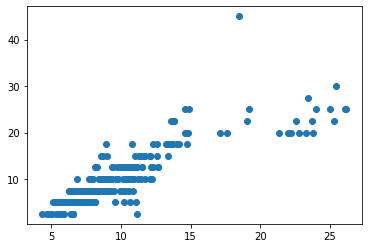

In [537]:
plt.scatter(test_results_df['Prediction'], test_results_df['Actual'])

In [407]:
results_df.head()

Prediction  Actual  Percent Change      binned
0    7.404012     7.5       -1.279837   -5% to 0%
1   13.164834    12.5        5.318669   5% to 10%
2    3.423941     2.5       36.957633  20% to 100
3    9.121675     7.5       21.622330  20% to 100
4    8.251206     7.5       10.016082  10% to 20%

In [344]:
pickle.dump(clf, open('initial_model.p', 'wb'))